# Import Modules

In [1]:
# read in modules

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy import signal
from astropy.table import Table
from DELCgen import *
import nolds

import toolbox_variability
import MS_Variability


These auto-correlation function have been computed numerically in Wolfram Mathematica (notebook also avaliable in the Github folder) for PSD=1/(1+(f/f_bend)^(slope)),where tau=1/f_bend and f is frequency.
They are tabulated as function of tau (invserse frequncy of the break in PSD), slope(high frequency slope of the PSD) and time.
avaliable tau (in units of ' time units (t.u.)')are: [  10.   15.   20.   25.   30.   35.   40.   45.   50.   55.   60.   65.
   70.   75.   80.   85.   90.   95.  100.  150.  200.  250.  300.  350.
  400.  450.  500.  550.  600.  650.  700.  750.  800.  850.  900.  950.
 1000.]
avaliable slopes are: [0.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9]
largest avaliable time is [t.u.]: 1000.0


In [2]:
# define paths

path_data = '/Volumes/Tacchella/Work/Postdoc/variability/catalogs/SFH/'
path_figures = '/Users/sandrotacchella/ASTRO/SFH_Variability/variability_SFHs/figures/'


# Read in Data

In [3]:
# read in files

dict_data, list_alpha, list_tau = toolbox_variability.read_in_files(path_data + 'SFH_04_*.hdf5', mode='r')


In [4]:
# create unique list

list_of_slopes = np.unique(list_alpha)
list_of_tau = np.unique(list_tau)

print list_of_slopes
print list_of_tau


[0.  0.5 1.  1.2 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.8
 3.  3.5 4. ]
[  10.   30.   50.   70.   80.   90.  100.  110.  120.  140.  160.  200.
  250.  300.  400.  600. 1000.]


# Plot one example

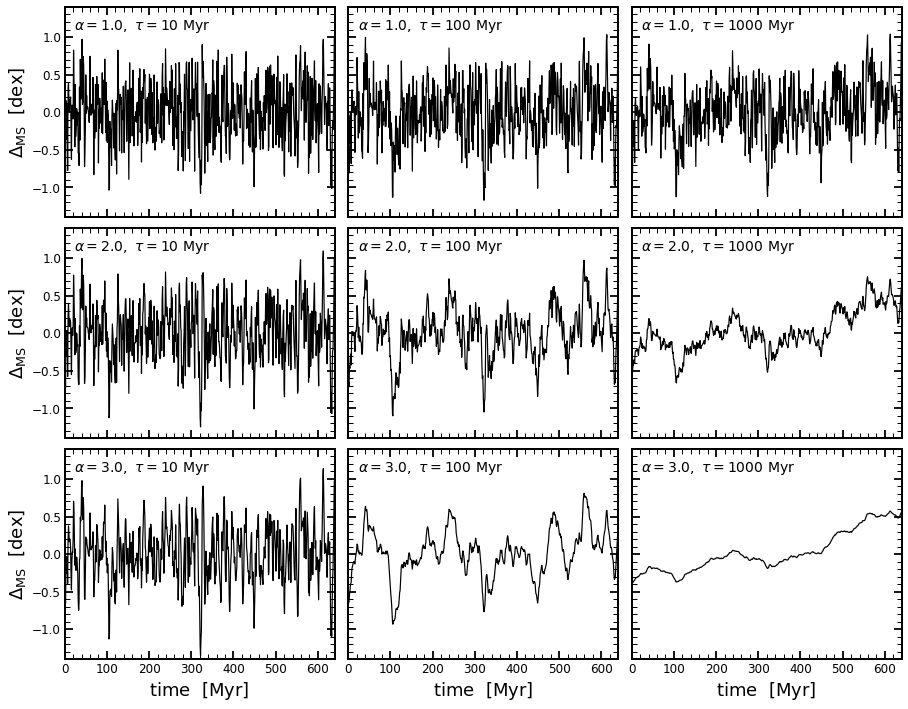

In [5]:
# plot grid with varying tau and slope

slope_plot = [1.0, 2.0, 3.0]
tau_plot = [10.0, 100.0, 1000.0]
scatter = 0.4

fig, axes = plt.subplots(nrows=len(slope_plot), ncols=len(tau_plot), figsize=(5.0*len(tau_plot), 4.0*len(slope_plot)))

for ii in range(len(slope_plot)):
    for jj in range(len(tau_plot)):
        ax = axes[ii][jj]
        LC = Simulate_TK_Lightcurve(BendingPL, (1.0, 1.0/(tau_plot[jj]), slope_plot[ii], 0.0, 0.0), randomSeed=100, RedNoiseL=10, aliasTbin=1.0, tbin=1, length=3000)
        norm = scatter/np.std(LC.flux[:])
        ax.plot(norm*LC.flux[:640], '-', lw=1.2, color='black')
        ax.text(23, 1.1, r'$\alpha=%.1f,\ \tau=%.0f$ Myr' %(slope_plot[ii], tau_plot[jj]), fontsize=14)
        ax.set_xlim([0.0, 640.0])
        ax.set_ylim([-1.4, 1.4])
        if (ii<len(slope_plot)-1):
            ax.set_xlabel('', fontsize=18)
            ax.xaxis.set_ticklabels([])
        else:
            ax.set_xlabel(r'$\mathrm{time}\/\/\/\/[\mathrm{Myr}]$', fontsize=18)
        if (jj>=1):
            ax.set_ylabel('', fontsize=18)
            ax.yaxis.set_ticklabels([])
        else:
            ax.set_ylabel(r'$\Delta_{\rm MS}\/\/\/\/[\mathrm{dex}]$', fontsize=18)
        
            
plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.savefig(path_figures + 'Example_SFHs.pdf', bbox_inches='tight')
plt.show()


# Compute Scatter

In [6]:

def get_SFH_stats(SFH_array):
    '''
    Get basic statistics of SFH array.
    '''
    print 'mean (last): ', np.round(np.mean(SFH_array[:, -1]), 3)
    print 'std (last): ', np.round(np.std(SFH_array[:, -1]), 3)
    print 'mean (all): ', np.round(np.median(SFH_array[:, -1]), 3)
    print 'std (all): ', np.round(np.std(SFH_array), 3)
    #print 'std (time): ', np.round(np.mean(np.std(SFH_array, axis=0)), 3)


********************
alpha =  0.0   and tau =  10.0
mean (last):  0.013
std (last):  0.417
mean (all):  0.013
std (all):  0.4


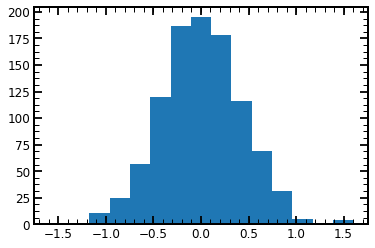

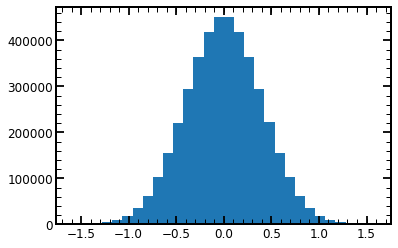

********************
alpha =  0.0   and tau =  50.0
mean (last):  -0.002
std (last):  0.399
mean (all):  -0.015
std (all):  0.4


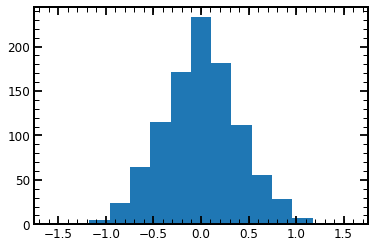

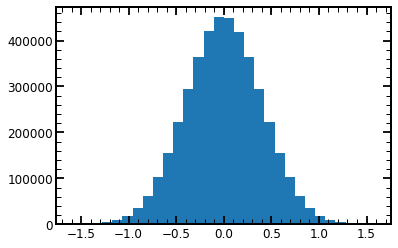

********************
alpha =  0.0   and tau =  100.0
mean (last):  -0.007
std (last):  0.383
mean (all):  0.015
std (all):  0.4


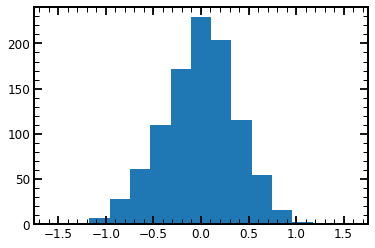

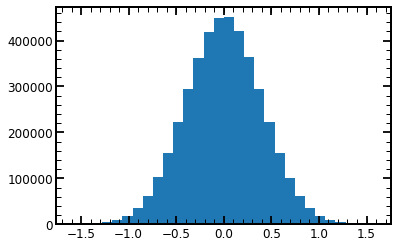

********************
alpha =  0.0   and tau =  1000.0
mean (last):  -0.009
std (last):  0.394
mean (all):  -0.015
std (all):  0.4


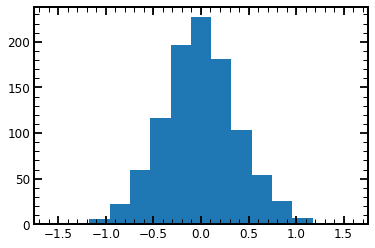

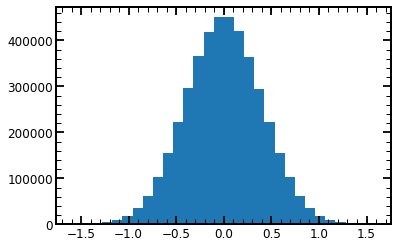

********************
alpha =  1.0   and tau =  10.0
mean (last):  -0.003
std (last):  0.397
mean (all):  -0.002
std (all):  0.4


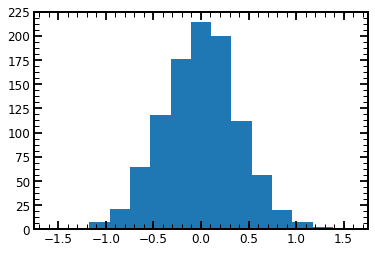

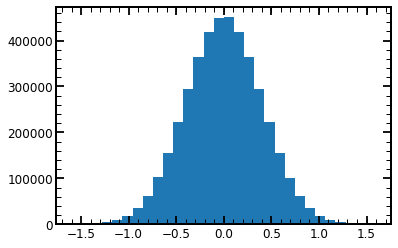

********************
alpha =  1.0   and tau =  50.0
mean (last):  -0.004
std (last):  0.394
mean (all):  -0.005
std (all):  0.4


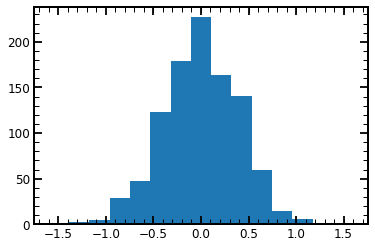

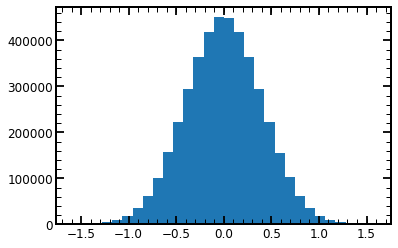

********************
alpha =  1.0   and tau =  100.0
mean (last):  -0.005
std (last):  0.409
mean (all):  0.001
std (all):  0.4


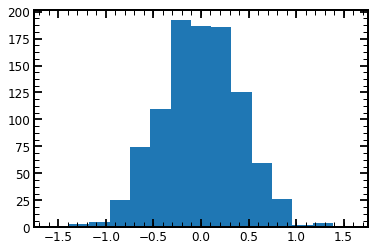

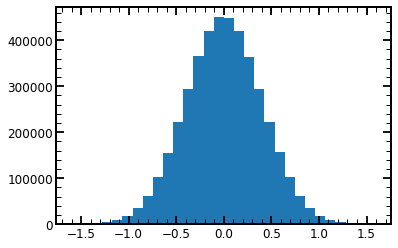

********************
alpha =  1.0   and tau =  1000.0
mean (last):  0.006
std (last):  0.398
mean (all):  0.003
std (all):  0.4


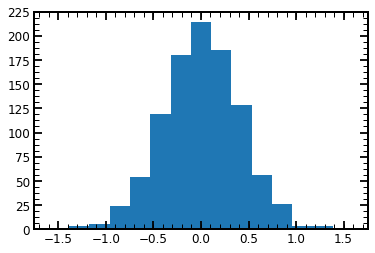

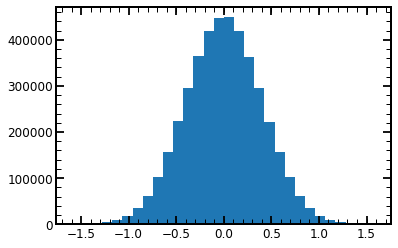

********************
alpha =  2.0   and tau =  10.0
mean (last):  0.012
std (last):  0.395
mean (all):  0.006
std (all):  0.4


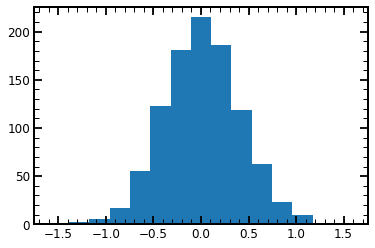

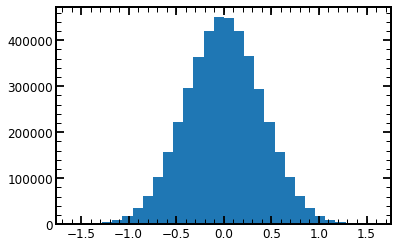

********************
alpha =  2.0   and tau =  50.0
mean (last):  0.016
std (last):  0.397
mean (all):  0.028
std (all):  0.4


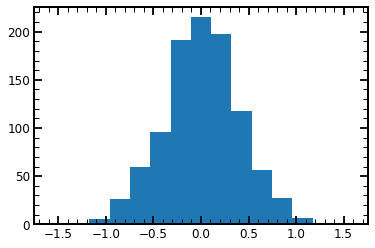

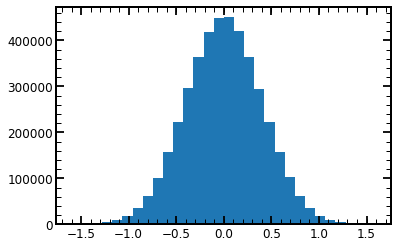

********************
alpha =  2.0   and tau =  100.0
mean (last):  -0.018
std (last):  0.389
mean (all):  0.004
std (all):  0.4


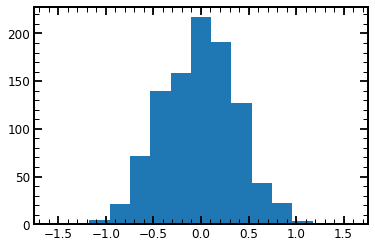

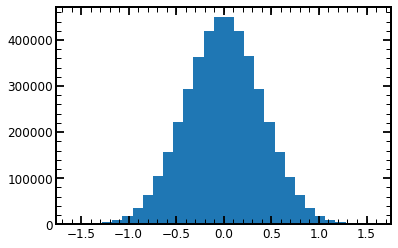

********************
alpha =  2.0   and tau =  1000.0
mean (last):  -0.013
std (last):  0.394
mean (all):  -0.022
std (all):  0.4


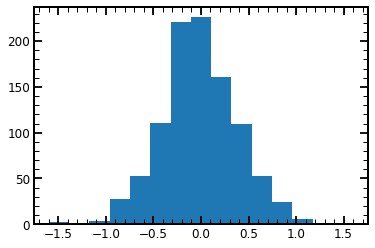

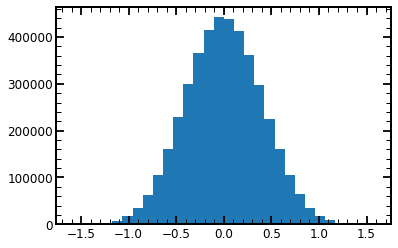

********************
alpha =  3.0   and tau =  10.0
mean (last):  0.006
std (last):  0.395
mean (all):  -0.007
std (all):  0.4


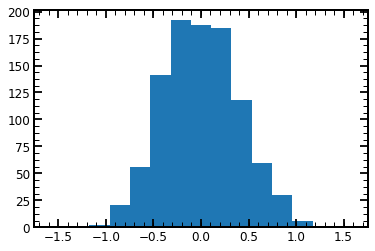

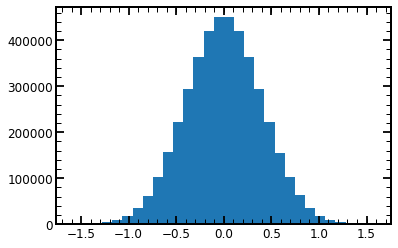

********************
alpha =  3.0   and tau =  50.0
mean (last):  -0.02
std (last):  0.387
mean (all):  -0.007
std (all):  0.4


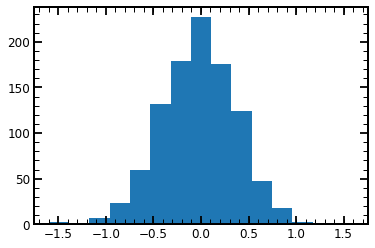

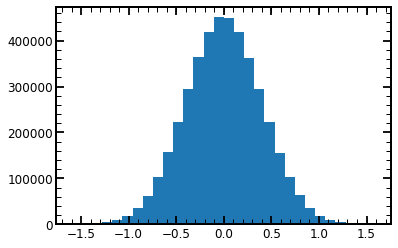

********************
alpha =  3.0   and tau =  100.0
mean (last):  -0.004
std (last):  0.398
mean (all):  -0.01
std (all):  0.4


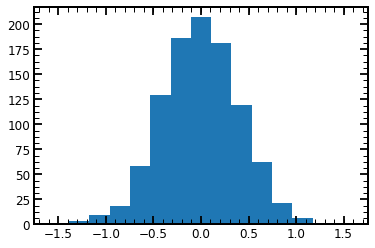

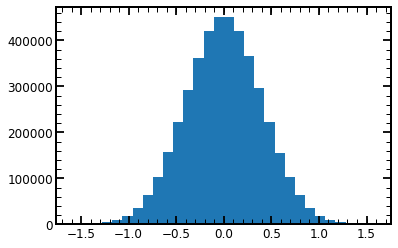

********************
alpha =  3.0   and tau =  1000.0
mean (last):  0.034
std (last):  0.401
mean (all):  0.035
std (all):  0.4


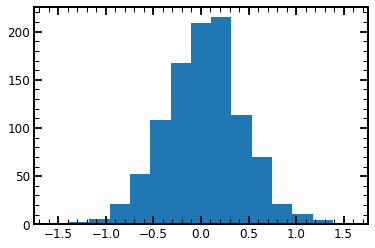

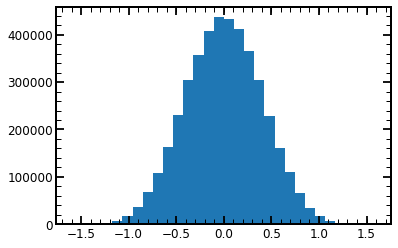

********************
alpha =  4.0   and tau =  10.0
mean (last):  0.002
std (last):  0.403
mean (all):  0.009
std (all):  0.4


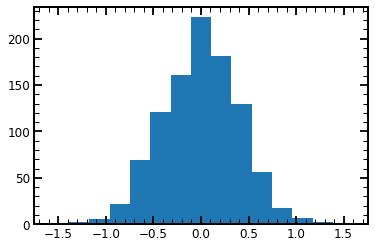

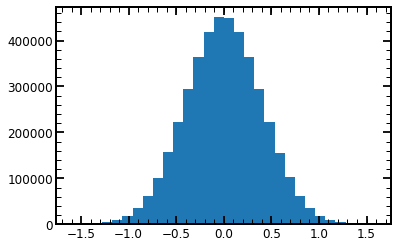

********************
alpha =  4.0   and tau =  50.0
mean (last):  -0.002
std (last):  0.401
mean (all):  -0.019
std (all):  0.4


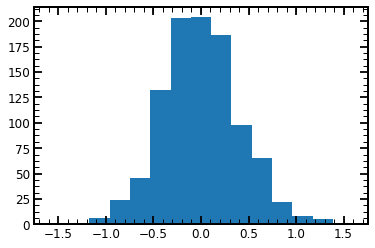

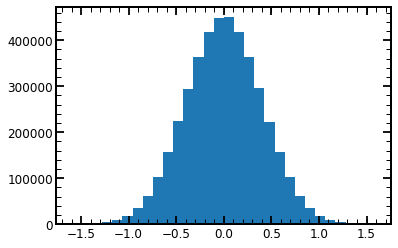

********************
alpha =  4.0   and tau =  100.0
mean (last):  0.013
std (last):  0.398
mean (all):  0.009
std (all):  0.4


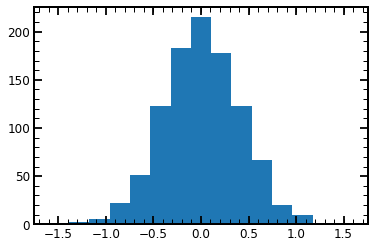

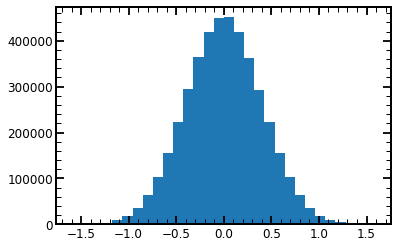

********************
alpha =  4.0   and tau =  1000.0
mean (last):  0.007
std (last):  0.414
mean (all):  0.004
std (all):  0.4


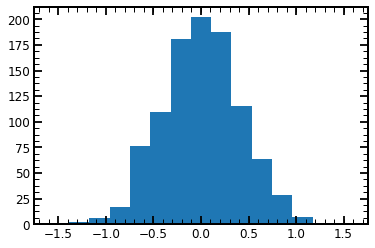

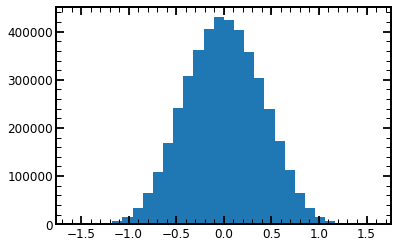

In [7]:
# check distribution around MS ridgeline

for ii in [0.0, 1.0, 2.0, 3.0, 4.0]:
    for jj in [10.0, 50.0, 100.0, 1000.0]:
        print '********************'
        print 'alpha = ', ii, '  and tau = ', jj
        get_SFH_stats(dict_data[ii][jj]['SFH/SFR'][:])
        plt.hist(dict_data[ii][jj]['SFH/SFR'][:][:, -1], bins=np.linspace(-1.6, 1.6, num=16))
        plt.show()
        plt.hist(np.ravel(dict_data[ii][jj]['SFH/SFR'][:]), bins=np.linspace(-1.6, 1.6, num=31))
        plt.show()



# Plot Example SFHs, Power Spectrum and Auto-Correlation Function

In [8]:

def get_PSD(sample_of_SFH, num_gal=1000):
    '''
    Compute the median (in log space) periodogram from the given SFH.
    '''
    for ii in range(sample_of_SFH.shape[0])[:num_gal]:
        if (ii == 0.0):
            frequency, PSD_array = signal.periodogram(sample_of_SFH[ii], fs=1.0)
        else:
            f, Pxx_den = signal.periodogram(sample_of_SFH[ii], fs=1.0)
            PSD_array = np.vstack([PSD_array, Pxx_den])
    log_PSD_16 = np.percentile(np.log10(PSD_array), 16, axis=0)
    log_PSD_50 = np.percentile(np.log10(PSD_array), 50, axis=0)
    log_PSD_84 = np.percentile(np.log10(PSD_array), 84, axis=0)
    return(frequency[1:-1], log_PSD_16[1:-1], log_PSD_50[1:-1], log_PSD_84[1:-1])


def get_ACF(SFH):
    time= range(1, 1000)
    res = []
    variance_of_SFH_history = np.var(SFH)
    for i in time:
        res.append(np.mean(SFH[1:-i]*SFH[i+1:])/variance_of_SFH_history)
    return(time, res)

        
def get_ACF_sample(sample_of_SFH, num_gal=100):
    for ii in range(sample_of_SFH.shape[0])[:num_gal]:
        if (ii == 0.0):
            time, ACF_array = get_ACF(sample_of_SFH[ii])
        else:
            t, ACF = get_ACF(sample_of_SFH[ii])
            ACF_array = np.vstack([ACF_array, ACF])
    ACF_array_16 = np.percentile(ACF_array, 16, axis=0)
    ACF_array_50 = np.percentile(ACF_array, 50, axis=0)
    ACF_array_84 = np.percentile(ACF_array, 84, axis=0)
    return(time, ACF_array_16, ACF_array_50, ACF_array_84)




/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


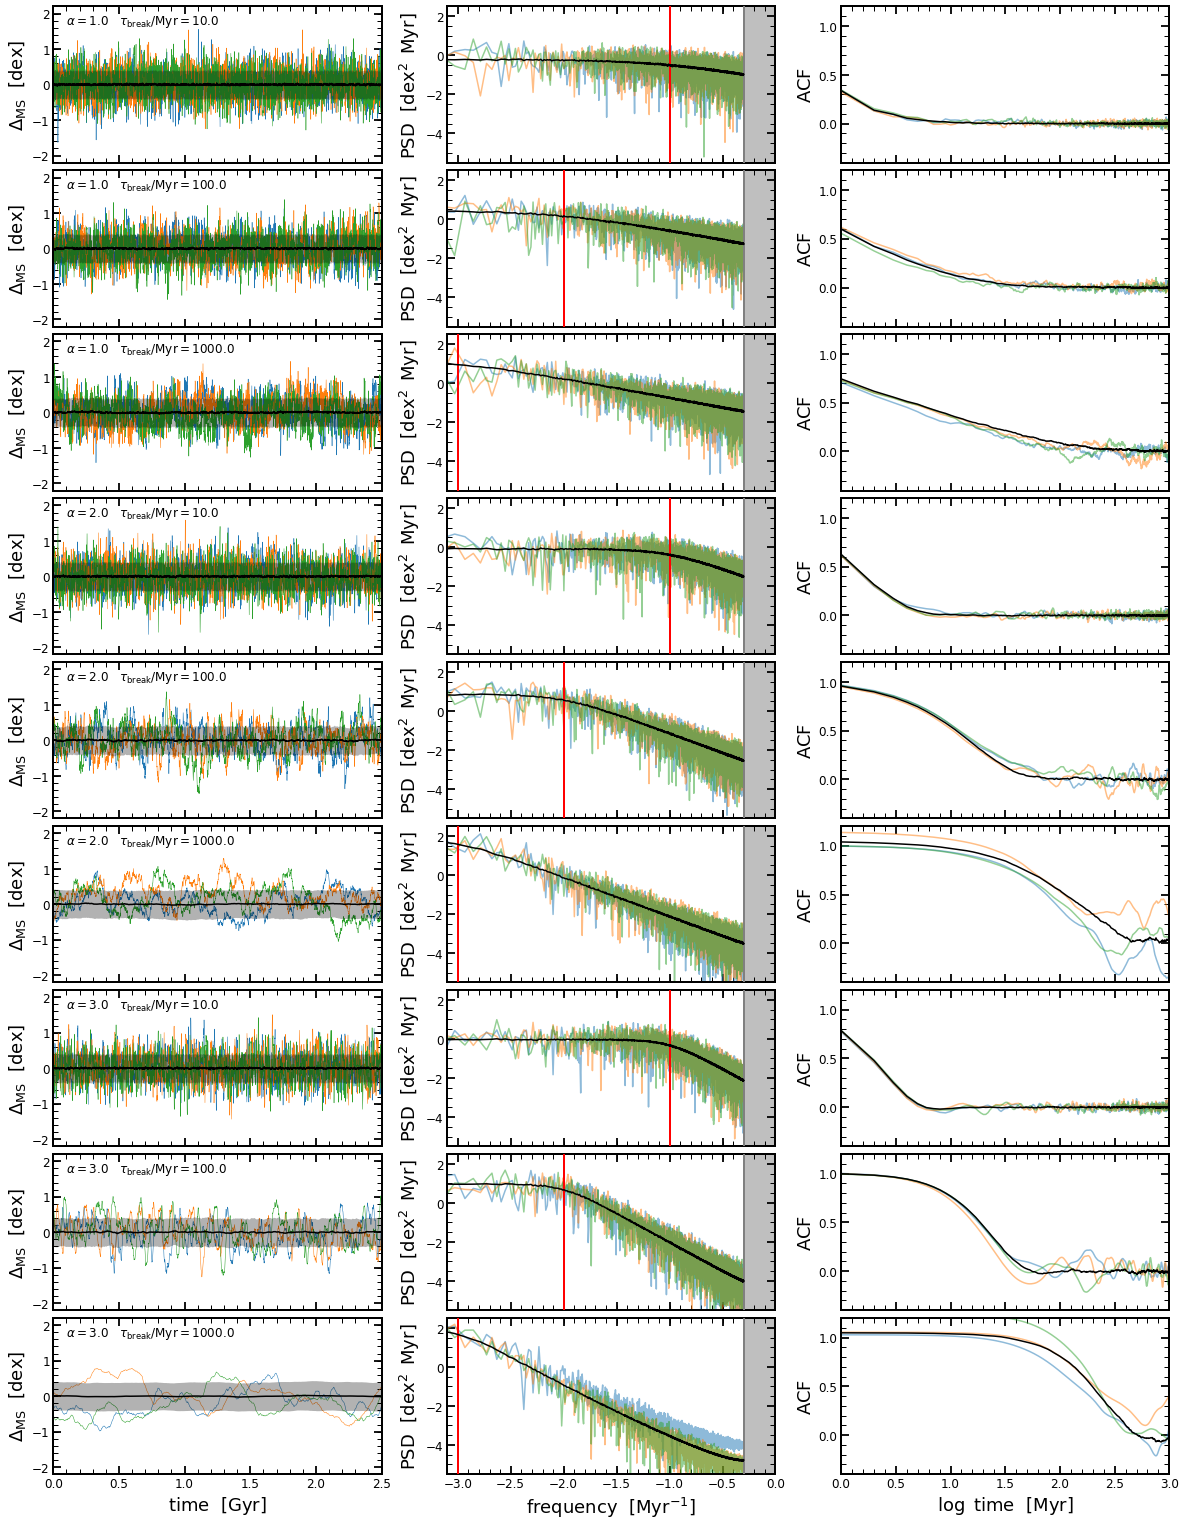

In [9]:

slope_plot = [1.0, 2.0, 3.0]
tau_plot = [10.0, 100.0, 1000.0]

idx_gal1 = 2
idx_gal2 = 20
idx_gal3 = 80


fig, axes = plt.subplots(nrows=len(slope_plot)*len(tau_plot), ncols=3, figsize=(20.0, 3*len(slope_plot)*len(tau_plot)))

counter = 0
for ii in slope_plot:
    for jj in tau_plot:
        
        ax1 = axes[counter][0]
        ax2 = axes[counter][1]
        ax3 = axes[counter][2]

        f_all, P16_all, P50_all, P84_all = get_PSD(dict_data[ii][jj]['SFH/SFR'][:][:])
        mean, std = np.mean(dict_data[ii][jj]['SFH/SFR'][:][:], axis=0), np.std(dict_data[ii][jj]['SFH/SFR'][:][:], axis=0)
        
        t_all, ACF_all_P16, ACF_all_P50, ACF_all_P84 = get_ACF_sample(dict_data[ii][jj]['SFH/SFR'][:][:])
        
        ax1.plot(dict_data[ii][jj]['SFH/time'][:], mean, '-', alpha=1.0, color='black', rasterized=True, zorder=10)
        ax1.fill_between(dict_data[ii][jj]['SFH/time'][:], mean+std, mean-std, alpha=0.3, lw=0, color='black', rasterized=True, zorder=10)
        ax2.axvline(x=np.log10(1.0/(jj)), color='red', lw=2, zorder=8)
        ax2.axvline(x=np.log10(1.0/2.0), color='gray', lw=2, zorder=8)
        ax2.axvspan(np.log10(1.0/2.0), 1.0, alpha=0.5, color='gray')
        ax2.plot(np.log10(f_all), P50_all, '-', alpha=1.0, color='black', rasterized=True, zorder=10)
        ax3.plot(np.log10(t_all), ACF_all_P50, '-', alpha=1.0, color='black', rasterized=True, zorder=10)

        ax1.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH/SFR'][:][idx_gal1], '-', alpha=1.0, lw=0.5, rasterized=True)
        f, Pxx_den = signal.periodogram(dict_data[ii][jj]['SFH/SFR'][:][idx_gal1], fs=1.0)
        ax2.plot(np.log10(f[1:-1]), np.log10(Pxx_den[1:-1]), '-', alpha=0.5, rasterized=True)
        t, ACF = get_ACF(dict_data[ii][jj]['SFH/SFR'][:][idx_gal1])
        ax3.plot(np.log10(t), ACF, '-', alpha=0.5, rasterized=True)
        
        ax1.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH/SFR'][:][idx_gal2], '-', alpha=1.0, lw=0.5, rasterized=True)
        f, Pxx_den = signal.periodogram(dict_data[ii][jj]['SFH/SFR'][:][idx_gal2], fs=1.0)
        ax2.plot(np.log10(f[1:-1]), np.log10(Pxx_den[1:-1]), '-', alpha=0.5, rasterized=True)
        t, ACF = get_ACF(dict_data[ii][jj]['SFH/SFR'][:][idx_gal2])
        ax3.plot(np.log10(t), ACF, '-', alpha=0.5, rasterized=True)

        ax1.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH/SFR'][:][idx_gal3], '-', alpha=1.0, lw=0.5, rasterized=True)
        f, Pxx_den = signal.periodogram(dict_data[ii][jj]['SFH/SFR'][:][idx_gal3], fs=1.0)
        ax2.plot(np.log10(f[1:-1]), np.log10(Pxx_den[1:-1]), '-', alpha=0.5, rasterized=True)
        t, ACF = get_ACF(dict_data[ii][jj]['SFH/SFR'][:][idx_gal3])
        ax3.plot(np.log10(t), ACF, '-', alpha=0.5, rasterized=True)

        ax1.text(0.1, 1.7, r'$\alpha=%.1f$' % ii, fontsize=12)
        ax1.text(0.5, 1.7, r'$\tau_{\rm break}/\mathrm{Myr}=%.1f$' % jj, fontsize=12)

        ax1.set_xlim([0.0, 2.5])
        ax1.set_ylim([-2.2, 2.2])
        ax2.set_xlim([-3.1, 0.0])
        ax2.set_ylim([-5.5, 2.5])
        ax3.set_xlim([0.0, 3.0])
        ax3.set_ylim([-0.4, 1.2])

        
        if (counter == len(slope_plot)*len(tau_plot)-1):
            ax1.set_xlabel(r'$\mathrm{time}\/\/\/\/[\mathrm{Gyr}]$', fontsize=18)
            ax2.set_xlabel(r'$\mathrm{frequency}\/\/\/\/[\mathrm{Myr}^{-1}]$', fontsize=18)
            ax3.set_xlabel(r'$\log\/\/\/\mathrm{time}\/\/\/\/[\mathrm{Myr}]$', fontsize=18)
        else:
            ax1.set_xlabel('', fontsize=18)
            ax2.set_xlabel('', fontsize=18)
            ax3.set_xlabel('', fontsize=18)
            ax1.xaxis.set_ticklabels([])
            ax2.xaxis.set_ticklabels([])
            ax3.xaxis.set_ticklabels([])
        ax1.set_ylabel(r'$\Delta_{\rm MS}\/\/\/\/[\mathrm{dex}]$', fontsize=18)
        ax2.set_ylabel(r'$\mathrm{PSD}\/\/\/\/[\mathrm{dex}^{2}\/\/\/\mathrm{Myr}]$', fontsize=18)
        ax3.set_ylabel(r'$\mathrm{ACF}$', fontsize=18)
        #ax.set_title(list_sample_SFHs_str[ii_SFH], fontsize=20)
        counter += 1

plt.subplots_adjust(hspace=0.05, wspace=0.2)
plt.savefig(path_figures + 'Example_SFHs_withPSD.pdf', bbox_inches='tight')
plt.show()


# Burstiness

B = \frac{sigma/mu-1}{sigma/mu+1}

where sigma is the standard deviation of the SFR, and mu is the mean SFR. Using this definition, the burstiness ranges from -1 to 1; a uniform distribution has a burstiness B = -1, an exponential distribution has a burstiness B = 0, and the burstiness approaches 1 as sigma/mu -> infinity. We calculate the rate in TBD Myr intervals.


In [10]:
def get_burstiness(SFH, dt=100, num_rand_samples=1):
    dt = int(dt)
    random_times = np.random.randint(1000, len(SFH)-dt, num_rand_samples)
    B_list = []
    for ii_t in random_times:
        sig = np.std(SFH[ii_t:ii_t+dt])
        mu = np.mean(SFH[ii_t:ii_t+dt])
        B_list.append((sig/mu-1.0)/(sig/mu+1.0))
    return(np.median(B_list))


def get_burstiness_sample(sample_of_SFH, num_gal=100, dt=100, num_rand_samples=1):
    for ii in range(sample_of_SFH.shape[0])[:num_gal]:
        if (ii == 0.0):
            B_array = get_burstiness(sample_of_SFH[ii], dt=dt, num_rand_samples=num_rand_samples)
        else:
            B = get_burstiness(sample_of_SFH[ii], dt=dt, num_rand_samples=num_rand_samples)
            B_array = np.vstack([B_array, B])
    B_array_16 = np.percentile(B_array, 16, axis=0)
    B_array_50 = np.percentile(B_array, 50, axis=0)
    B_array_84 = np.percentile(B_array, 84, axis=0)
    return(B_array_16, B_array_50, B_array_84)


def get_burstiness_matrix(num_gal=100, dt=100, num_rand_samples=1):
    '''
    Computes burstiness in 2d array.
    '''
    burstiness_matrix = np.zeros((len(list_of_slopes), len(list_of_tau)))
    for ii_slope in range(len(list_of_slopes)):
        print 'progress (%) = ', np.round(100.0*(ii_slope+1)/len(list_of_slopes), 0)
        for jj_tau in range(len(list_of_tau)):
            B_data = get_burstiness_sample(dict_data[list_of_slopes[ii_slope]][list_of_tau[jj_tau]]['SFH/SFR'][:][:], num_gal=num_gal, dt=dt, num_rand_samples=num_rand_samples)
            burstiness_matrix[ii_slope][jj_tau] = B_data[1]
    return(burstiness_matrix)


In [11]:
burstiness_matrix = get_burstiness_matrix(num_gal=500, dt=30, num_rand_samples=50)

progress (%) =  5.0
progress (%) =  10.0
progress (%) =  14.0
progress (%) =  19.0
progress (%) =  24.0
progress (%) =  29.0
progress (%) =  33.0
progress (%) =  38.0
progress (%) =  43.0
progress (%) =  48.0
progress (%) =  52.0
progress (%) =  57.0
progress (%) =  62.0
progress (%) =  67.0
progress (%) =  71.0
progress (%) =  76.0
progress (%) =  81.0
progress (%) =  86.0
progress (%) =  90.0
progress (%) =  95.0
progress (%) =  100.0


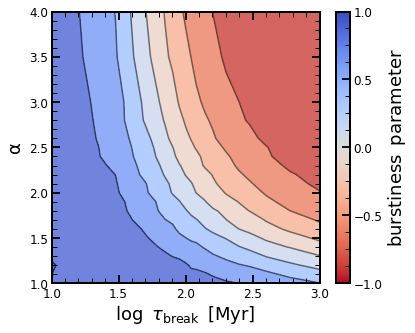

In [12]:
# plot burstiness

vmin, vmax = -1.0, 1.0
cmap_in = plt.cm.coolwarm_r

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.0, 5.0))

X, Y = np.meshgrid(np.log10(list_of_tau), list_of_slopes[2:])
ax.contourf(X, Y, burstiness_matrix[2:, :], alpha=0.8, vmin=vmin, vmax=vmax, cmap=cmap_in)
ax.contour(X, Y, burstiness_matrix[2:, :], alpha=0.5, linestyles='solid', colors='k')

m = plt.cm.ScalarMappable(cmap=cmap_in)
m.set_array(burstiness_matrix)
m.set_clim(vmin, vmax)
CBI = plt.colorbar(m, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
CBI.set_label(r'$\mathrm{burstiness}\/\/\/\mathrm{parameter}$', fontsize=18)

ax.set_xlabel(r'$\log\/\/\/\tau_{\rm break}\/\/\/[\mathrm{Myr}]$', fontsize=18)
ax.set_ylabel(r'$\mathrm{\alpha}$', fontsize=18)
plt.savefig(path_figures + 'Burstiness_Parameter.pdf', bbox_inches='tight')
plt.show()




# Hurst parameter

Explanation of Hurst exponent:

    The Hurst exponent is a measure for the “long-term memory” of a time series, meaning the long statistical dependencies in the data that do not originate from cycles.

    It originates from H.E. Hursts observations of the problem of long-term storage in water reservoirs. If x_i is the discharge of a river in year i and we observe this discharge for N years, we can calculate the storage capacity that would be required to keep the discharge steady at its mean value.

    To do so, we first substract the mean over all x_i from the individual x_i to obtain the departures x’_i from the mean for each year i. As the excess or deficit in discharge always carrys over from year i to year i+1, we need to examine the cumulative sum of x’_i, denoted by y_i. This cumulative sum represents the filling of our hypothetical storage. If the sum is above 0, we are storing excess discharge from the river, if it is below zero we have compensated a deficit in discharge by releasing water from the storage. The range (maximum - minimum) R of y_i therefore represents the total capacity required for the storage.

    Hurst showed that this value follows a steady trend for varying N if it is normalized by the standard deviation sigma over the x_i. Namely he obtained the following formula:

    R/sigma = (N/2)^K

    In this equation, K is called the Hurst exponent. Its value is 0.5 for white noise, but becomes greater for time series that exhibit some positive dependency on previous values. For negative dependencies it becomes less than 0.5.

see also: 

www.oa.uj.edu.pl/M.Tarnopolski/paper.pdf

https://en.wikipedia.org/wiki/Hurst_exponent


In [13]:

def get_hurst(slope, tau, num_rand_samples=1):
    '''
    Computes and returns Hurst parameter.
    '''
    idx_gal_sample = np.random.randint(0, dict_data[slope][tau]['SFH/SFR'][:].shape[0], num_rand_samples)
    hurst_list = np.array([nolds.hurst_rs(dict_data[slope][tau]['SFH/SFR'][:][idx_gal]) for idx_gal in idx_gal_sample]) 
    return(np.nanpercentile(hurst_list, 16), np.nanpercentile(hurst_list, 50), np.nanpercentile(hurst_list, 84))


def get_Hurst_matrix(num_rand_samples):
    '''
    Computes Hurst in 2d array.
    '''
    Hurst_matrix = np.zeros((len(list_of_slopes), len(list_of_tau)))
    for ii_slope in range(len(list_of_slopes)):
        print 'progress (%) = ', np.round(100.0*(ii_slope+1)/len(list_of_slopes), 0)
        for jj_tau in range(len(list_of_tau)):
            Hurst_data = get_hurst(list_of_slopes[ii_slope], list_of_tau[jj_tau], num_rand_samples)
            Hurst_matrix[ii_slope][jj_tau] = Hurst_data[1]
    return(Hurst_matrix)




In [14]:

Hurst_matrix = get_Hurst_matrix(num_rand_samples=25)


progress (%) =  5.0


/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:539: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)


progress (%) =  10.0
progress (%) =  14.0
progress (%) =  19.0
progress (%) =  24.0
progress (%) =  29.0
progress (%) =  33.0
progress (%) =  38.0
progress (%) =  43.0
progress (%) =  48.0
progress (%) =  52.0
progress (%) =  57.0
progress (%) =  62.0
progress (%) =  67.0
progress (%) =  71.0
progress (%) =  76.0
progress (%) =  81.0
progress (%) =  86.0
progress (%) =  90.0
progress (%) =  95.0
progress (%) =  100.0


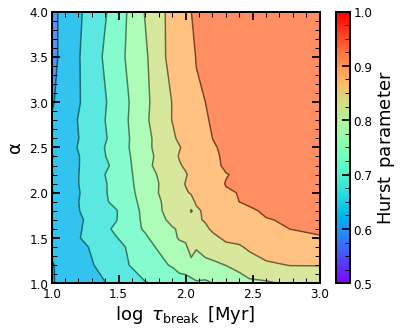

In [15]:
# plot power spectrum density

vmin, vmax = 0.5, 1.0
cmap_in = plt.cm.rainbow

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.0, 5.0))

X, Y = np.meshgrid(np.log10(list_of_tau), list_of_slopes[2:])
ax.contourf(X, Y, Hurst_matrix[2:, :], alpha=0.8, vmin=vmin, vmax=vmax, cmap=cmap_in)
ax.contour(X, Y, Hurst_matrix[2:, :], alpha=0.5, colors='k')

m = plt.cm.ScalarMappable(cmap=cmap_in)
m.set_array(Hurst_matrix)
m.set_clim(vmin, vmax)
CBI = plt.colorbar(m, ticks=[0.5,0.6,0.7,0.8,0.9,1.0])
CBI.set_label(r'$\mathrm{Hurst}\/\/\/\mathrm{parameter}$', fontsize=18)

ax.set_xlabel(r'$\log\/\/\/\tau_{\rm break}\/\/\/[\mathrm{Myr}]$', fontsize=18)
ax.set_ylabel(r'$\mathrm{\alpha}$', fontsize=18)
plt.savefig(path_figures + 'Hurst_Parameter.pdf', bbox_inches='tight')
plt.show()


# Averaging SFHs

In [40]:

def get_scatter(slope, tau, avg_timescale, num_rand_samples=1):
    '''
    Get MS scatter after averaging for a list of averaging timescales.
    '''
    scatter = []
    for dt in avg_timescale:
        if (num_rand_samples == 1):
            scatter.append(np.std(np.log10(np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, -dt:], axis=1))))
        else:
            random_times = np.random.randint(0, len(dict_data[slope][tau]['SFH/time'][:]), num_rand_samples)
            scat = []
            for time0 in random_times[random_times > dt]:
                scat.append(np.std(np.log10(np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, time0-dt:time0], axis=1))))
            scatter.append(np.median(scat))
    return(np.array(scatter))


def get_mean(slope, tau, avg_timescale, num_rand_samples=1):
    '''
    Get mean of MS after averaging for a list of averaging timescales.
    '''
    mean = []
    for dt in avg_timescale:
        if (num_rand_samples == 1):
            mean.append(np.mean(np.log10(np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, -dt:], axis=1))))
        else:
            random_times = np.random.randint(0, len(dict_data[slope][tau]['SFH/time'][:]), num_rand_samples)
            med = []
            for time0 in random_times[random_times > dt]:
                med.append(np.mean(np.log10(np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, time0-dt:time0], axis=1))))
            mean.append(np.median(med))
    return(np.array(mean))


def get_median(slope, tau, avg_timescale, num_rand_samples=1):
    '''
    Get median of MS after averaging for a list of averaging timescales.
    '''
    median = []
    for dt in avg_timescale:
        if (num_rand_samples == 1):
            median.append(np.median(np.log10(np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, -dt:], axis=1))))
        else:
            random_times = np.random.randint(0, len(dict_data[slope][tau]['SFH/time'][:]), num_rand_samples)
            med = []
            for time0 in random_times[random_times > dt]:
                med.append(np.median(np.log10(np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, time0-dt:time0], axis=1))))
            median.append(np.median(med))
    return(np.array(median))


def get_scatter_indicator(slope, tau, indicator, num_rand_samples=1):
    '''
    Get scatter of MS for a given indicator.
    '''
    dt = 1
    if (num_rand_samples == 1):
        scatter = np.std(np.log10(np.mean(np.power(10, dict_data[slope][tau][indicator][:][:, -dt:]), axis=1)))
    else:
        scat = []
        random_times = np.random.randint(0, len(dict_data[slope][tau]['SFH/time'][:]), num_rand_samples)
        for time0 in random_times[random_times > dt]:
            scat.append(np.std(np.log10(np.mean(np.power(10, dict_data[slope][tau][indicator][:][:, time0-dt:time0]), axis=1))))
        scatter = np.median(scat)
    return(scatter)


def get_scatter_indicator_all(slope, tau, indicator):
    '''
    Get scatter of MS for a given indicator.
    '''
    return(np.std(dict_data[slope][tau][indicator][:]))


def running_mean(SFH, dt):
    '''
    Running mean for SFH (in delta MS units).
    '''
    avg_SFH = []
    dt = int(dt)
    for ii in range(len(SFH)):
        if (ii < dt):
            avg_SFH.append(np.nan)
        else:
            avg_SFH.append(np.log10(np.mean(10**(SFH[ii-dt:ii]))))
    return(avg_SFH)




In [17]:
# Analytical predictions

def mean_power_10(t,x0,sigma,tau_decor):
    """! helping function that simulates averaging of the log space, assuming damped random walk 

    @param[in] tau          Decorellation time
    @param[in] slope        high frequency slope of the PSD
    @param[in] tmax         what is the largest time that you want to consider;

    """  
    return 10**(np.exp(-t/(2*tau_decor))*x0+sigma**2*(1-np.exp(-t/tau_decor))*np.log(10)/2)   

def get_mean_relation_analytical_help_function(tau_break,Tmax=None,sigmaMS=None):
    """!gives ratio between mean actual Delta MS and measured MS given some averaging timescale tMax
        -assumes nonchanging mean sequence amd assumes sigma_MS=0.4

    @param[in] tau          Decorellation time
    @param[in] slope        high frequency slope of the PSD
    @param[in] tmax         what is the largest time that you want to consider (see 'largest avaliable time is' above);
    """
    
    tau_decor=tau_break/(2*np.pi*2)
    
    if Tmax is None:
        Tmax=100
        
    if sigmaMS is None:
        sigmaMS=0.4
        
    res_mean=[]
    #range over which to calculate the relation
    for x0 in np.arange(-2,2.1,0.025):
        res=[]
        for t in range(Tmax):
            res.append(mean_power_10(t,x0,sigmaMS,tau_decor))
    
        res=np.array(res)
        res_mean.append([x0,np.log10(np.mean(res))])
    res_mean=np.array(res_mean)
    
    return res_mean


def get_median_analytical(tau, avg_timescale):
    '''
    !given median offset of MS after averaging over avg_timescale
    The function takes list of averaging timescale and calculate offset for galaxies which are exactly on the Main Sequence (offset=0) to get median offset
    assumes sigma_MS=0.4
    '''
    res_offset=[]
    
    for Tmax in avg_timescale:
        median_offset_for_single_T_binning=get_mean_relation_analytical_help_function(tau,Tmax,0.4)
        res_offset.append(median_offset_for_single_T_binning[(median_offset_for_single_T_binning[:,0]<0.01)&(median_offset_for_single_T_binning[:,0]>-0.01)][-1][-1])
        
    return res_offset

## Plot SFH averaged by some timescale

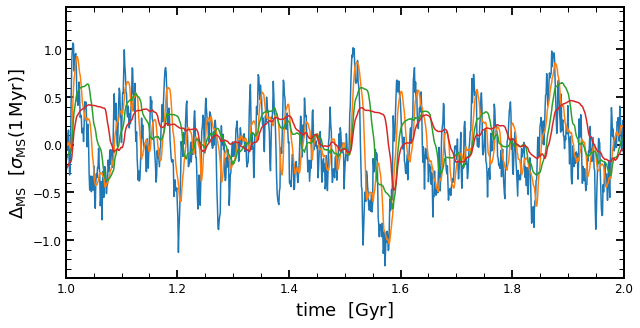

In [18]:
# show example of averaging SFH

ii, jj = 2.0, 50.0
idx_gal1 = 5

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.0, 5.0))

ax.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH/SFR'][:][idx_gal1], '-', alpha=1.0, rasterized=True)
ax.plot(dict_data[ii][jj]['SFH/time'][:], running_mean(dict_data[ii][jj]['SFH/SFR'][:][idx_gal1], 10), '-', alpha=1.0, rasterized=True)
ax.plot(dict_data[ii][jj]['SFH/time'][:], running_mean(dict_data[ii][jj]['SFH/SFR'][:][idx_gal1], 30), '-', alpha=1.0, rasterized=True)
ax.plot(dict_data[ii][jj]['SFH/time'][:], running_mean(dict_data[ii][jj]['SFH/SFR'][:][idx_gal1], 60), '-', alpha=1.0, rasterized=True)


ax.set_xlim([1.0, 2.0])
ax.set_xlabel(r'$\mathrm{time}\/\/\/\/[\mathrm{Gyr}]$', fontsize=18)
ax.set_ylabel(r'$\Delta_{\rm MS}\/\/\/\/[\sigma_{\rm MS}(1\/\mathrm{Myr})]$', fontsize=18)
#plt.savefig(path_Figs + 'SFR_about_MS_b ' + list_sample_SFHs_str_simple[ii_SFH] + '.pdf', bbox_inches='tight', dpi=400)
plt.show()


## Show how MS scatter/offset depend on avg timescale 

### offset MS

In [19]:

def get_DMS(slope, tau, avg_timescale, num_galaxies=10):
    DMS = []
    for ii_gal in range(num_galaxies):
        DMS.append(np.ravel(running_mean(dict_data[slope][tau]['SFH/SFR'][:][ii_gal], avg_timescale)))
    DMS = np.ravel(DMS)
    DMS = DMS[~np.isnan(DMS)]
    return(DMS)


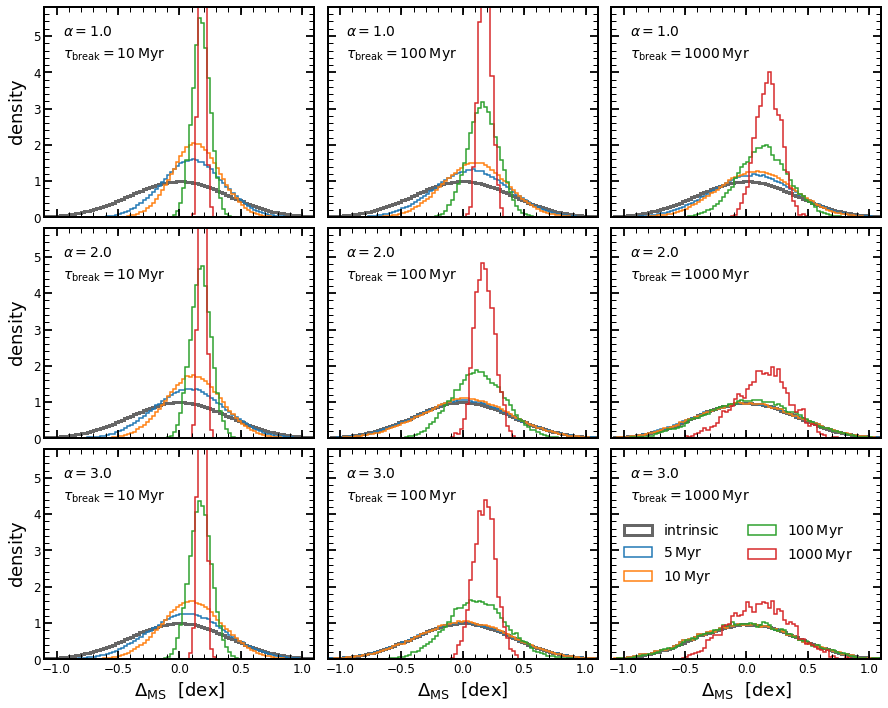

In [20]:
num_galaxies = 100
slope_plot = [1.0, 2.0, 3.0]
tau_plot = [10.0, 100.0, 1000.0]
bins = np.linspace(-1.4, 1.4, num=113)

fig, axes = plt.subplots(nrows=len(slope_plot), ncols=len(tau_plot), figsize=(5.0*len(tau_plot), 4.0*len(slope_plot)))

for ii in range(len(slope_plot)):
    for jj in range(len(tau_plot)):
        ax = axes[ii][jj]
        ax.hist(np.ravel(dict_data[slope_plot[ii]][tau_plot[jj]]['SFH/SFR'][:]), histtype='step', lw=3.0, color='black', alpha=0.6, normed=True, bins=bins, label=r'$\mathrm{intrinsic}$')
        DMS = get_DMS(slope_plot[ii], tau_plot[jj], 5.0, num_galaxies=num_galaxies)
        ax.hist(DMS, histtype='step', lw=1.5, normed=True, bins=bins, label=r'$5\/\mathrm{Myr}$')
        DMS = get_DMS(slope_plot[ii], tau_plot[jj], 10.0, num_galaxies=num_galaxies)
        ax.hist(DMS, histtype='step', lw=1.5, normed=True, bins=bins, label=r'$10\/\mathrm{Myr}$')
        DMS = get_DMS(slope_plot[ii], tau_plot[jj], 100.0, num_galaxies=num_galaxies)
        ax.hist(DMS, histtype='step', lw=1.5, normed=True, bins=bins, label=r'$100\/\mathrm{Myr}$')
        DMS = get_DMS(slope_plot[ii], tau_plot[jj], 1000.0, num_galaxies=num_galaxies)
        ax.hist(DMS, histtype='step', lw=1.5, normed=True, bins=bins, label=r'$1000\/\mathrm{Myr}$')
        ax.text(-0.95, 5.0, r'$\alpha=%.1f$' %(slope_plot[ii]), fontsize=14)
        ax.text(-0.95, 4.4, r'$\tau_{\rm break}=%.0f\/\mathrm{Myr}$' %(tau_plot[jj]), fontsize=14)
        ax.set_xlim([-1.1, 1.1])
        ax.set_ylim([0.0, 5.8])
        if (ii<len(slope_plot)-1):
            ax.set_xlabel('', fontsize=18)
            ax.xaxis.set_ticklabels([])
        else:
            ax.set_xlabel(r'$\Delta_{\rm MS}\/\/\/\/[\mathrm{dex}]$', fontsize=18)
        if (jj>=1):
            ax.set_ylabel('', fontsize=18)
            ax.yaxis.set_ticklabels([])
        else:
            ax.set_ylabel(r'$\mathrm{density}$', fontsize=18)
        if ((ii==len(slope_plot)-1) & (jj==len(tau_plot)-1)):
            ax.legend(loc='center left', frameon=False, ncol=2, fontsize=14)
        
            
plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.savefig(path_figures + 'DMS_distribution.pdf', bbox_inches='tight')
plt.show()


### scatter and offset 

In [21]:
# set up averaging timescale and number of samples to probe SFH

avg_timescale = np.unique(np.logspace(0.0, 2.5, num=12).astype('int'))
num_random_samples = 100


In [41]:
# analytical derivation

range_of_values = MS_Variability.get_scatter_MS(10,2)[:,0]
scatter_MS10 = 0.4*MS_Variability.get_scatter_MS(10,2)[:,1]
scatter_MS50 = 0.4*MS_Variability.get_scatter_MS(50,2)[:,1]
scatter_MS100 = 0.4*MS_Variability.get_scatter_MS(100,2)[:,1]
scatter_MS1000 = 0.4*MS_Variability.get_scatter_MS(1000,2)[:,1]
scatter_MS1 = 0.4*MS_Variability.get_scatter_MS(100,1.1)[:,1]
scatter_MS15 = 0.4*MS_Variability.get_scatter_MS(100,1.5)[:,1]
scatter_MS2 = 0.4*MS_Variability.get_scatter_MS(100,2)[:,1]
scatter_MS25 = 0.4*MS_Variability.get_scatter_MS(100,2.5)[:,1]
scatter_MS29 = 0.4*MS_Variability.get_scatter_MS(100,2.9)[:,1]


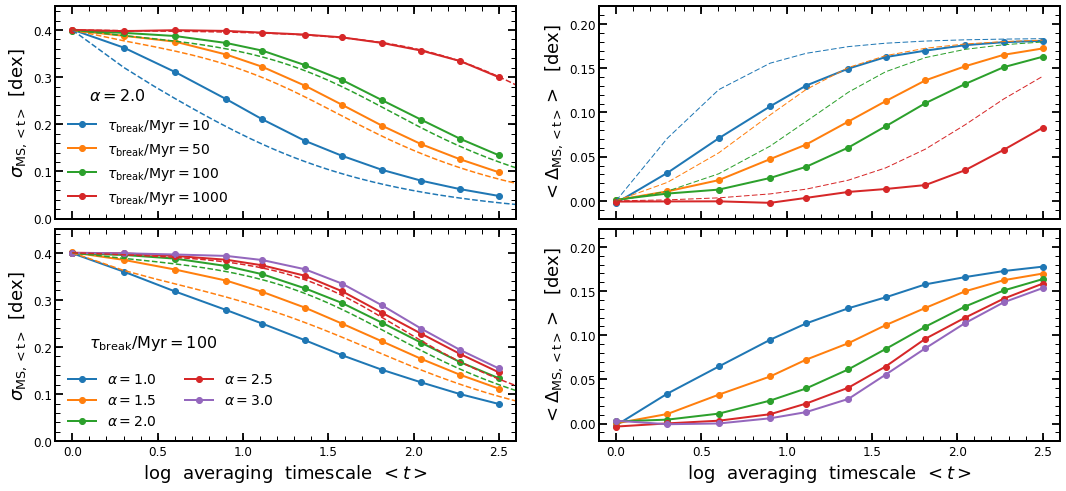

In [42]:
# make figure that shows how scatter of MS changes with averaging timescale

fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18.0, 8.0))

ax1.plot(np.log10(avg_timescale), get_scatter(2.0, 10.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\tau_{\rm break}/\mathrm{Myr}=10$')
ax1.plot(np.log10(avg_timescale), get_scatter(2.0, 50.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\tau_{\rm break}/\mathrm{Myr}=50$')
ax1.plot(np.log10(avg_timescale), get_scatter(2.0, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\tau_{\rm break}/\mathrm{Myr}=100$')
ax1.plot(np.log10(avg_timescale), get_scatter(2.0, 1000.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\tau_{\rm break}/\mathrm{Myr}=1000$')

ax1.plot(np.log10(range_of_values), scatter_MS10, ls='--', color='C0', label='__no_legend__')
ax1.plot(np.log10(range_of_values), scatter_MS50, ls='--', color='C1', label='__no_legend__')
ax1.plot(np.log10(range_of_values), scatter_MS100, ls='--', color='C2', label='__no_legend__')
ax1.plot(np.log10(range_of_values), scatter_MS1000, ls='--', color='C3', label='__no_legend__')

ax1.text(0.1, 0.25, r'$\alpha=2.0$', fontsize=16)

ax1.set_xlim([-0.1, 2.6])
ax1.set_ylim([0.0, 0.45])
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel(r'$\sigma_{\rm MS,<t>}\/\/\/[\mathrm{dex}]$', fontsize=18)
ax1.xaxis.set_ticklabels([])
ax1.legend(fontsize=14, frameon=False)

###

ax2.plot(np.log10(avg_timescale), get_scatter(1.0, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\alpha=1.0$')
ax2.plot(np.log10(avg_timescale), get_scatter(1.5, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\alpha=1.5$')
ax2.plot(np.log10(avg_timescale), get_scatter(2.0, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\alpha=2.0$')
ax2.plot(np.log10(avg_timescale), get_scatter(2.5, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\alpha=2.5$')
ax2.plot(np.log10(avg_timescale), get_scatter(3.0, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\alpha=3.0$')

ax2.plot(np.log10(range_of_values), scatter_MS15,color='C1',ls='--', label='__no_legend__')
ax2.plot(np.log10(range_of_values), scatter_MS2,color='C2',ls='--', label='__no_legend__')
ax2.plot(np.log10(range_of_values), scatter_MS25,color='C3',ls='--', label='__no_legend__')

ax2.text(0.1, 0.2, r'$\tau_{\rm break}/\mathrm{Myr}=100$', fontsize=16)

ax2.set_xlim([-0.1, 2.6])
ax2.set_ylim([0.0, 0.45])
ax2.set_xlabel(r'$\log\/\/\/\/\mathrm{averaging}\/\/\/\/\mathrm{timescale}\/\/\/<t>$', fontsize=18)
ax2.set_ylabel(r'$\sigma_{\rm MS,<t>}\/\/\/[\mathrm{dex}]$', fontsize=18)
ax2.legend(ncol=2, fontsize=14, frameon=False)

###

ax3.plot(np.log10(avg_timescale), get_median(2.0, 10.0, avg_timescale, num_random_samples), '-o', color='C0', lw=2, label=r'$\tau_{\rm break}/\mathrm{Myr}=10$')
ax3.plot(np.log10(avg_timescale), get_median(2.0, 50.0, avg_timescale, num_random_samples), '-o', color='C1', lw=2, label=r'$\tau_{\rm break}/\mathrm{Myr}=50$')
ax3.plot(np.log10(avg_timescale), get_median(2.0, 100.0, avg_timescale, num_random_samples), '-o', color='C2', lw=2, label=r'$\tau_{\rm break}/\mathrm{Myr}=100$')
ax3.plot(np.log10(avg_timescale), get_median(2.0, 1000.0, avg_timescale, num_random_samples), '-o', color='C3', lw=2, label=r'$\tau_{\rm break}/\mathrm{Myr}=1000$')

ax3.plot(np.log10(avg_timescale), get_median_analytical(10, avg_timescale), '--', color='C0', lw=1)
ax3.plot(np.log10(avg_timescale), get_median_analytical(50, avg_timescale), '--', color='C1', lw=1)
ax3.plot(np.log10(avg_timescale), get_median_analytical(100, avg_timescale), '--', color='C2', lw=1)
ax3.plot(np.log10(avg_timescale), get_median_analytical(1000, avg_timescale), '--', color='C3',lw=1)


#ax3.text(0.08, 0.45, r'$\alpha=2.0$', fontsize=16)

ax3.set_xlim([-0.1, 2.6])
ax3.set_ylim([-0.02, 0.22])
ax3.set_xlabel('', fontsize=18)
ax3.set_ylabel(r'$<\Delta_{\rm MS, <t>}>\/\/\/\/[\mathrm{dex}]$', fontsize=18)
ax3.xaxis.set_ticklabels([])
#ax3.legend(fontsize=14, frameon=False)

###

ax4.plot(np.log10(avg_timescale), get_median(1.0, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\alpha=1.0$')
ax4.plot(np.log10(avg_timescale), get_median(1.5, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\alpha=1.5$')
ax4.plot(np.log10(avg_timescale), get_median(2.0, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\alpha=2.0$')
ax4.plot(np.log10(avg_timescale), get_median(2.5, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\alpha=2.5$')
ax4.plot(np.log10(avg_timescale), get_median(3.0, 100.0, avg_timescale, num_random_samples), '-o', lw=2, label=r'$\alpha=3.0$')


#ax4.text(0.08, 0.6, r'$\tau_{\rm break}/\mathrm{Myr}=100$', fontsize=16)

ax4.set_xlim([-0.1, 2.6])
ax4.set_ylim([-0.02, 0.22])
ax4.set_xlabel(r'$\log\/\/\/\/\mathrm{averaging}\/\/\/\/\mathrm{timescale}\/\/\/<t>$', fontsize=18)
ax4.set_ylabel(r'$<\Delta_{\rm MS, <t>}>\/\/\/\/[\mathrm{dex}]$', fontsize=18)
#ax4.legend(ncol=2, fontsize=14, frameon=False)


###

plt.subplots_adjust(hspace=0.05, wspace=0.18)

plt.savefig(path_figures + 'scatter_offset_avgT.pdf', bbox_inches='tight')
plt.show()


# SFH by indicator

In [26]:
# define function that calculates ratio of scatter for different tracers

def get_scatter_ratio_matrix(tracer1, tracer2, num_rand_samples):
    ratio_values = np.zeros((len(list_of_slopes), len(list_of_tau)))
    for ii_slope in range(len(list_of_slopes)):
        print 'progress (%) = ', np.round(100.0*ii_slope/len(list_of_slopes), 0)
        for jj_tau in range(len(list_of_tau)):
            sigma_1 = get_scatter_indicator(list_of_slopes[ii_slope], list_of_tau[jj_tau], tracer1, num_rand_samples=num_rand_samples)
            sigma_2 = get_scatter_indicator(list_of_slopes[ii_slope], list_of_tau[jj_tau], tracer2, num_rand_samples=num_rand_samples)
            ratio_values[ii_slope][jj_tau] = sigma_1/sigma_2
    return(ratio_values)


def get_scatter_ratio_matrix_all(tracer1, tracer2):
    ratio_values = np.zeros((len(list_of_slopes), len(list_of_tau)))
    for ii_slope in range(len(list_of_slopes)):
        print 'progress (%) = ', np.round(100.0*ii_slope/len(list_of_slopes), 0)
        for jj_tau in range(len(list_of_tau)):
            sigma_1 = get_scatter_indicator_all(list_of_slopes[ii_slope], list_of_tau[jj_tau], tracer1)
            sigma_2 = get_scatter_indicator_all(list_of_slopes[ii_slope], list_of_tau[jj_tau], tracer2)
            ratio_values[ii_slope][jj_tau] = sigma_1/sigma_2
    return(ratio_values)


def get_scatter_matrix_all(indicator):
    mat_values = np.zeros((len(list_of_slopes), len(list_of_tau)))
    for ii_slope in range(len(list_of_slopes)):
        print 'progress (%) = ', np.round(100.0*ii_slope/len(list_of_slopes), 0)
        for jj_tau in range(len(list_of_tau)):
            mat_values[ii_slope][jj_tau] = get_scatter_indicator_all(list_of_slopes[ii_slope], list_of_tau[jj_tau], indicator)
    return(mat_values)





## Plot SFHs as seen by indicator

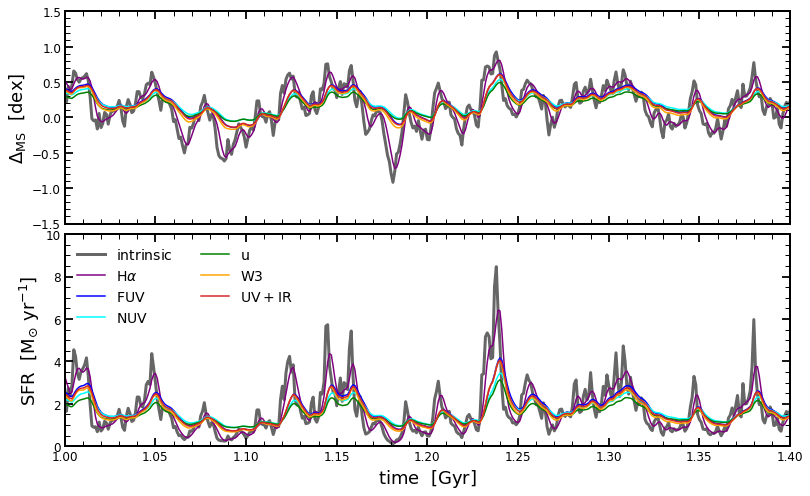

In [27]:

ii, jj = 2.0, 100.0
idx_gal1 = 100

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13.0, 8.0))

###

ax=axes[0]

ax.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH/SFR'][:][idx_gal1], '-', lw=3, color='black', alpha=0.6)
ax.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH_conv/SFR_Ha'][:][idx_gal1], '-', color='purple', alpha=1.0)
ax.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH_conv/SFR_FUV'][:][idx_gal1], '-', color='blue', alpha=1.0)
ax.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH_conv/SFR_NUV'][:][idx_gal1], '-', color='cyan', alpha=1.0)
ax.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH_conv/SFR_u'][:][idx_gal1], '-', color='green', alpha=1.0)
ax.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH_conv/SFR_W3'][:][idx_gal1], '-', color='orange', alpha=1.0)
ax.plot(dict_data[ii][jj]['SFH/time'][:], dict_data[ii][jj]['SFH_conv/SFR_UVIR'][:][idx_gal1], '-', color='C3', alpha=1.0)


ax.set_xlim([1.0, 1.4])
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel('', fontsize=18)
ax.set_ylabel(r'$\Delta_{\rm MS}\/\/\/\/[\mathrm{dex}]$', fontsize=18)
ax.xaxis.set_ticklabels([])


###

ax=axes[1]

ax.plot(dict_data[ii][jj]['SFH/time'][:], 10**dict_data[ii][jj]['SFH/SFR'][:][idx_gal1], '-', lw=3, color='black', alpha=0.6, label=r'$\mathrm{intrinsic}$')
ax.plot(dict_data[ii][jj]['SFH/time'][:], 10**dict_data[ii][jj]['SFH_conv/SFR_Ha'][:][idx_gal1], '-', color='purple', alpha=1.0, label=r'$\mathrm{H}\alpha$')
ax.plot(dict_data[ii][jj]['SFH/time'][:], 10**dict_data[ii][jj]['SFH_conv/SFR_FUV'][:][idx_gal1], '-', color='blue', alpha=1.0, label=r'$\mathrm{FUV}$')
ax.plot(dict_data[ii][jj]['SFH/time'][:], 10**dict_data[ii][jj]['SFH_conv/SFR_NUV'][:][idx_gal1], '-', color='cyan', alpha=1.0, label=r'$\mathrm{NUV}$')
ax.plot(dict_data[ii][jj]['SFH/time'][:], 10**dict_data[ii][jj]['SFH_conv/SFR_u'][:][idx_gal1], '-', color='green', alpha=1.0, label=r'$\mathrm{u}$')
ax.plot(dict_data[ii][jj]['SFH/time'][:], 10**dict_data[ii][jj]['SFH_conv/SFR_W3'][:][idx_gal1], '-', color='orange', alpha=1.0, label=r'$\mathrm{W3}$')
ax.plot(dict_data[ii][jj]['SFH/time'][:], 10**dict_data[ii][jj]['SFH_conv/SFR_UVIR'][:][idx_gal1], '-', color='C3', alpha=1.0, label=r'$\mathrm{UV+IR}$')


ax.set_xlim([1.0, 1.4])
ax.set_ylim([0.0, 10.0])
ax.set_xlabel(r'$\mathrm{time}\/\/\/\/[\mathrm{Gyr}]$', fontsize=18)
ax.set_ylabel(r'$\mathrm{SFR}\/\/\/\/[\mathrm{M_{\odot}}\/\/\mathrm{yr}^{-1}]$', fontsize=18)
ax.legend(frameon=False, fontsize=14, ncol=2)

###

plt.subplots_adjust(hspace=0.05)

plt.savefig(path_figures + 'SFH_by_indicator.pdf', bbox_inches='tight')
plt.show()


## Look at scatter about MS (shape) 

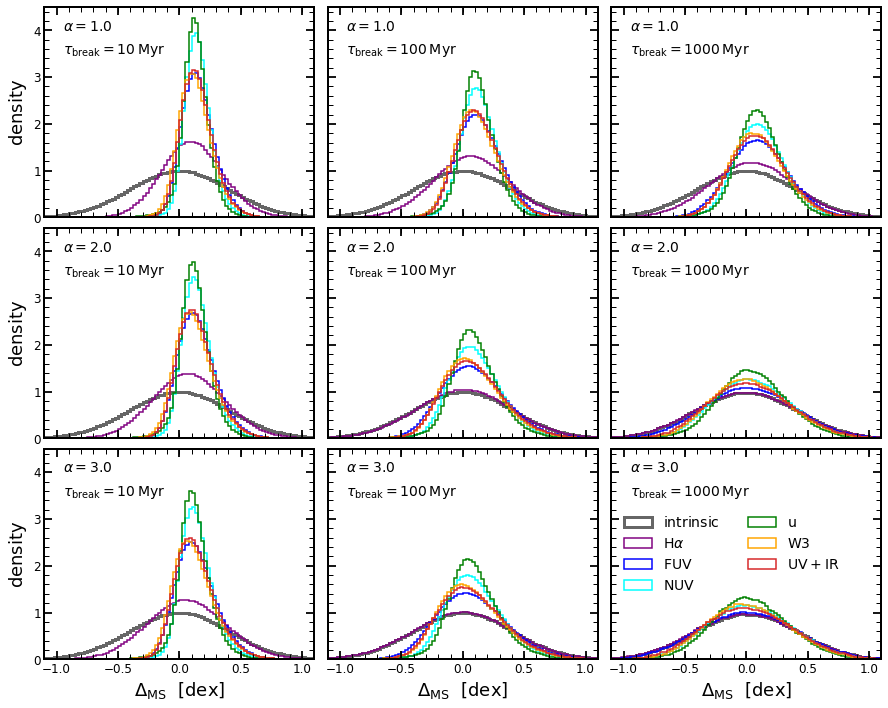

In [28]:
bins = np.linspace(-1.4, 1.4, num=113)

slope_plot = [1.0, 2.0, 3.0]
tau_plot = [10.0, 100.0, 1000.0]

fig, axes = plt.subplots(nrows=len(slope_plot), ncols=len(tau_plot), figsize=(5.0*len(tau_plot), 4.0*len(slope_plot)))

for ii in range(len(slope_plot)):
    for jj in range(len(tau_plot)):
        ax = axes[ii][jj]
        ax.hist(np.ravel(dict_data[slope_plot[ii]][tau_plot[jj]]['SFH/SFR'][:]), histtype='step', lw=3.0, color='black', alpha=0.6, normed=True, bins=bins, label=r'$\mathrm{intrinsic}$')
        ax.hist(np.ravel(dict_data[slope_plot[ii]][tau_plot[jj]]['SFH_conv/SFR_Ha'][:]), color='purple', histtype='step', lw=1.5, normed=True, bins=bins, label=r'$\mathrm{H}\alpha$')
        ax.hist(np.ravel(dict_data[slope_plot[ii]][tau_plot[jj]]['SFH_conv/SFR_FUV'][:]), color='blue', histtype='step', lw=1.5, normed=True, bins=bins, label=r'$\mathrm{FUV}$')
        ax.hist(np.ravel(dict_data[slope_plot[ii]][tau_plot[jj]]['SFH_conv/SFR_NUV'][:]), color='cyan', histtype='step', lw=1.5, normed=True, bins=bins, label=r'$\mathrm{NUV}$')
        ax.hist(np.ravel(dict_data[slope_plot[ii]][tau_plot[jj]]['SFH_conv/SFR_u'][:]), color='green', histtype='step', lw=1.5, normed=True, bins=bins, label=r'$\mathrm{u}$')
        ax.hist(np.ravel(dict_data[slope_plot[ii]][tau_plot[jj]]['SFH_conv/SFR_W3'][:]), color='orange', histtype='step', lw=1.5, normed=True, bins=bins, label=r'$\mathrm{W3}$')
        ax.hist(np.ravel(dict_data[slope_plot[ii]][tau_plot[jj]]['SFH_conv/SFR_UVIR'][:]), color='C3', histtype='step', lw=1.5, normed=True, bins=bins, label=r'$\mathrm{UV+IR}$')
        ax.text(-0.95, 4.0, r'$\alpha=%.1f$' %(slope_plot[ii]), fontsize=14)
        ax.text(-0.95, 3.5, r'$\tau_{\rm break}=%.0f\/\mathrm{Myr}$' %(tau_plot[jj]), fontsize=14)
        ax.set_xlim([-1.1, 1.1])
        ax.set_ylim([0.0, 4.5])
        if (ii<len(slope_plot)-1):
            ax.set_xlabel('', fontsize=18)
            ax.xaxis.set_ticklabels([])
        else:
            ax.set_xlabel(r'$\Delta_{\rm MS}\/\/\/\/[\mathrm{dex}]$', fontsize=18)
        if (jj>=1):
            ax.set_ylabel('', fontsize=18)
            ax.yaxis.set_ticklabels([])
        else:
            ax.set_ylabel(r'$\mathrm{density}$', fontsize=18)
        if ((ii==len(slope_plot)-1) & (jj==len(tau_plot)-1)):
            ax.legend(loc='center left', frameon=False, ncol=2, fontsize=14)
        
            
plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.savefig(path_figures + 'DMS_distribution_indicators.pdf', bbox_inches='tight')
plt.show()


## MS scatter from different indicators 

In [29]:
# compute scatter matrix

sigma_mat_Ha = get_scatter_matrix_all('SFH_conv/SFR_Ha')
sigma_mat_UVIR = get_scatter_matrix_all('SFH_conv/SFR_UVIR')
sigma_mat_u = get_scatter_matrix_all('SFH_conv/SFR_u')
sigma_mat_FUV = get_scatter_matrix_all('SFH_conv/SFR_FUV')
sigma_mat_NUV = get_scatter_matrix_all('SFH_conv/SFR_NUV')
sigma_mat_W3 = get_scatter_matrix_all('SFH_conv/SFR_W3')



progress (%) =  0.0
progress (%) =  5.0
progress (%) =  10.0
progress (%) =  14.0
progress (%) =  19.0
progress (%) =  24.0
progress (%) =  29.0
progress (%) =  33.0
progress (%) =  38.0
progress (%) =  43.0
progress (%) =  48.0
progress (%) =  52.0
progress (%) =  57.0
progress (%) =  62.0
progress (%) =  67.0
progress (%) =  71.0
progress (%) =  76.0
progress (%) =  81.0
progress (%) =  86.0
progress (%) =  90.0
progress (%) =  95.0
progress (%) =  0.0
progress (%) =  5.0
progress (%) =  10.0
progress (%) =  14.0
progress (%) =  19.0
progress (%) =  24.0
progress (%) =  29.0
progress (%) =  33.0
progress (%) =  38.0
progress (%) =  43.0
progress (%) =  48.0
progress (%) =  52.0
progress (%) =  57.0
progress (%) =  62.0
progress (%) =  67.0
progress (%) =  71.0
progress (%) =  76.0
progress (%) =  81.0
progress (%) =  86.0
progress (%) =  90.0
progress (%) =  95.0
progress (%) =  0.0
progress (%) =  5.0
progress (%) =  10.0
progress (%) =  14.0
progress (%) =  19.0
progress (%) =  24.

KeyboardInterrupt: 

In [ ]:
# figure of scatter by different tracers

## set parameters ##
X, Y = np.meshgrid(np.log10(list_of_tau), list_of_slopes[2:])
vmin, vmax = 0.0, 0.4
pos_text = [2.9, 3.6]

## start figure ##
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(14.0, 8.0))

## plot data: scatter ##
ax1.contour(X, Y, sigma_mat_Ha[2:, :], alpha=1, vmin=vmin, vmax=vmax)
ax1.contourf(X, Y, sigma_mat_Ha[2:, :], alpha=0.8, vmin=vmin, vmax=vmax)

ax2.contour(X, Y, sigma_mat_FUV[2:, :], alpha=1, vmin=vmin, vmax=vmax)
CS = ax2.contourf(X, Y, sigma_mat_FUV[2:, :], alpha=0.8, vmin=vmin, vmax=vmax)

ax3.contour(X, Y, sigma_mat_NUV[2:, :], alpha=1, vmin=vmin, vmax=vmax)
ax3.contourf(X, Y, sigma_mat_NUV[2:, :], alpha=0.8, vmin=vmin, vmax=vmax)

ax4.contour(X, Y, sigma_mat_u[2:, :], alpha=1, vmin=vmin, vmax=vmax)
ax4.contourf(X, Y, sigma_mat_u[2:, :], alpha=0.8, vmin=vmin, vmax=vmax)

ax5.contour(X, Y, sigma_mat_W3[2:, :], alpha=1, vmin=vmin, vmax=vmax)
ax5.contourf(X, Y, sigma_mat_W3[2:, :], alpha=0.8, vmin=vmin, vmax=vmax)

ax6.contour(X, Y, sigma_mat_UVIR[2:, :], alpha=1, vmin=vmin, vmax=vmax)
ax6.contourf(X, Y, sigma_mat_UVIR[2:, :], alpha=0.8, vmin=vmin, vmax=vmax)

## text in each panel ##
ax1.text(pos_text[0], pos_text[1], r'$\sigma_{\rm H\alpha}$', fontsize=18, ha='right')
ax2.text(pos_text[0], pos_text[1], r'$\sigma_{\rm FUV}$', fontsize=18, ha='right')
ax3.text(pos_text[0], pos_text[1], r'$\sigma_{\rm NUV}$', fontsize=18, ha='right')
ax4.text(pos_text[0], pos_text[1], r'$\sigma_{\rm u}$', fontsize=18, ha='right')
ax5.text(pos_text[0], pos_text[1], r'$\sigma_{\rm W3}$', fontsize=18, ha='right')
ax6.text(pos_text[0], pos_text[1], r'$\sigma_{\rm UV+IR}$', fontsize=18, ha='right')

## label of ticks: switch off where not needed ##
ax1.xaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax3.xaxis.set_ticklabels([])
ax3.yaxis.set_ticklabels([])
ax5.yaxis.set_ticklabels([])
ax6.yaxis.set_ticklabels([])

## axes labels ##
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel(r'$\mathrm{powerlaw}\/\/\/\mathrm{slope}\/\/\/\alpha$', fontsize=18)
ax2.set_xlabel('', fontsize=18)
ax2.set_ylabel('', fontsize=18)
ax3.set_xlabel('', fontsize=18)
ax3.set_ylabel('', fontsize=18)
ax4.set_xlabel(r'$\log\/\/\/\tau_{\rm break}\/\/\/[\mathrm{Myr}]$', fontsize=18)
ax4.set_ylabel(r'$\mathrm{powerlaw}\/\/\/\mathrm{slope}\/\/\/\alpha$', fontsize=18)
ax5.set_xlabel(r'$\log\/\/\/\tau_{\rm break}\/\/\/[\mathrm{Myr}]$', fontsize=18)
ax5.set_ylabel('', fontsize=18)
ax6.set_xlabel(r'$\log\/\/\/\tau_{\rm break}\/\/\/[\mathrm{Myr}]$', fontsize=18)
ax6.set_ylabel('', fontsize=18)

## colorbar ##
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
CBI = fig.colorbar(CS, cax=cbar_ax)
CBI.set_label(r'$\sigma\/\/\/[\mathrm{dex}]$', fontsize=18)

## organize and save
plt.subplots_adjust(hspace=0.07, wspace=0.07)
plt.savefig(path_figures + 'scatter_indicators.pdf', bbox_inches='tight')
plt.show()



## Look at SFR ratio for different indicators 

In [ ]:
plot_every_other = 1

time_investigate = [-2000, -1500, -1000, -500, -1]

slope_plot = [1.0, 2.0, 3.0]
tau_plot = [10.0, 100.0, 1000.0]

box1 = [1.0, -0.5, 1.0, 1.0]
box2 = [2.0, -0.5, 1.0, 1.0]
box3 = [2.0, 0.5, 1.0, 1.0]
box4 = [3.0, 1.5, 1.0, 2.0]
box_col_list = ['gold', 'C3', 'orange', 'C0']

def fraction_in_box(ratio_SFR_u_Ha, ratio_SFR_UV_Ha, box):
    return(np.round(100.0*np.sum((ratio_SFR_u_Ha >= box[0]) & (ratio_SFR_u_Ha < box[0]+box[2]) & (ratio_SFR_UV_Ha >= box[1]) & (ratio_SFR_UV_Ha < box[1]+box[3]))/len(ratio_SFR_u_Ha), 1))


fig, axes = plt.subplots(nrows=len(slope_plot), ncols=len(tau_plot), figsize=(5.0*len(tau_plot), 4.0*len(slope_plot)))

for ii in range(len(slope_plot)):
    for jj in range(len(tau_plot)):
        ax = axes[ii][jj]
        diff_FUV_Ha, diff_u_Ha, SFR_1Myr, SFR_100Myr = [], [], [], []
        for time0 in time_investigate:
            diff_FUV_Ha = np.append(diff_FUV_Ha, np.ravel(dict_data[slope_plot[ii]][tau_plot[jj]]['SFH_conv/SFR_FUV'][:][:, time0]-dict_data[slope_plot[ii]][tau_plot[jj]]['SFH_conv/SFR_Ha'][:][:, time0]))
            diff_u_Ha = np.append(diff_u_Ha, np.ravel(dict_data[slope_plot[ii]][tau_plot[jj]]['SFH_conv/SFR_u'][:][:, time0]-dict_data[slope_plot[ii]][tau_plot[jj]]['SFH_conv/SFR_Ha'][:][:, time0]))
            SFR_1Myr = np.append(SFR_1Myr, 10**dict_data[slope_plot[ii]][tau_plot[jj]]['SFH/SFR'][:][:, time0])
            SFR_100Myr = np.append(SFR_100Myr, np.mean(10**dict_data[slope_plot[ii]][tau_plot[jj]]['SFH/SFR'][:][:, time0-100:time0], axis=1))
        ratio_SFR_UV_Ha = diff_FUV_Ha[::plot_every_other]
        ratio_SFR_u_Ha = diff_u_Ha[::plot_every_other]
        diff_abs = np.log10(SFR_1Myr/SFR_100Myr)
        #print np.max(diff_abs)
        #print np.min(diff_abs)
        ax.scatter(ratio_SFR_u_Ha, ratio_SFR_UV_Ha, c=diff_abs, alpha=0.2, rasterized=True, marker='.', s=40, vmin=-1.5, vmax=1.0)
        #ax.plot(np.median(diff_u_Ha), np.median(diff_FUV_Ha), 'o', ms=20, color='cyan')
        ax.text(-0.5, 1.2, r'$\alpha=%.1f,\ \tau_{\rm break}=%.0f$ Myr' %(slope_plot[ii], tau_plot[jj]), fontsize=14)
        ax.set_xlim([-0.6, 1.5])
        ax.set_ylim([-0.6, 1.5])
        if (ii<len(slope_plot)-1):
            ax.set_xlabel('', fontsize=18)
            ax.xaxis.set_ticklabels([])
        else:
            ax.set_xlabel(r'$\log\/\/\/\mathrm{SFR}_{\rm u}\//\/\mathrm{SFR}_{\rm H\alpha}$', fontsize=18)
        if (jj>=1):
            ax.set_ylabel('', fontsize=18)
            ax.yaxis.set_ticklabels([])
        else:
            ax.set_ylabel(r'$\log\/\/\/\mathrm{SFR}_{\rm FUV}\//\/\mathrm{SFR}_{\rm H\alpha}$', fontsize=18)
        if ((ii==len(slope_plot)-1) & (jj==len(tau_plot)-1)):
            ax.legend(loc='center left', frameon=False, ncol=2, fontsize=14)
        # add boxes# look at complete SFH
#        ax.add_patch(patches.Rectangle((box1[0], box1[1]), box1[2], box1[3], lw=2, edgecolor=box_col_list[0], facecolor='none', zorder=10))
#        ax.add_patch(patches.Rectangle((box2[0], box2[1]), box2[2], box2[3], lw=2, edgecolor=box_col_list[1], facecolor='none', zorder=10))
#        ax.add_patch(patches.Rectangle((box3[0], box3[1]), box3[2], box3[3], lw=2, edgecolor=box_col_list[2], facecolor='none', zorder=10))
#        ax.add_patch(patches.Rectangle((box4[0], box4[1]), box4[2], box4[3], lw=2, edgecolor=box_col_list[3], facecolor='none', zorder=10))        ax.text(box1[0]+0.5*box1[2], box1[1]+0.5*box1[3], str(fraction_in_box(diff_u_Ha, diff_FUV_Ha, box1)), zorder=10, color='black', va='center', ha='center', bbox=dict(boxstyle="square", fc=(1.0, 1.0, 1.0), alpha=0.8))
#        ax.text(box2[0]+0.5*box2[2], box2[1]+0.5*box2[3], str(fraction_in_box(diff_u_Ha, diff_FUV_Ha, box2)), zorder=10, color='black', va='center', ha='center', bbox=dict(boxstyle="square", fc=(1.0, 1.0, 1.0), alpha=0.8))
#        ax.text(box3[0]+0.5*box3[2], box3[1]+0.5*box3[3], str(fraction_in_box(diff_u_Ha, diff_FUV_Ha, box3)), zorder=10, color='black', va='center', ha='center', bbox=dict(boxstyle="square", fc=(1.0, 1.0, 1.0), alpha=0.8))
#        ax.text(box4[0]+0.5*box4[2], box4[1]+0.5*box4[3], str(fraction_in_box(diff_u_Ha, diff_FUV_Ha, box4)), zorder=10, color='black', va='center', ha='center', bbox=dict(boxstyle="square", fc=(1.0, 1.0, 1.0), alpha=0.8))
        
## colorbar ##
CS = ax.scatter([-99.0, -99.0], [-99.0, -99.0], c=[-3.0, 1.5], alpha=1.0, rasterized=True, marker='.', s=40, vmin=-1.5, vmax=1.0)
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
CBI = fig.colorbar(CS, cax=cbar_ax)
CBI.set_label(r'$\log\/\/\/\mathrm{SFR_{\rm 1Myr}}\//\/\mathrm{SFR_{\rm 100Myr}}$', fontsize=18)

plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.savefig(path_figures + 'Ratio_distribution_indicators.pdf', bbox_inches='tight')
plt.show()


# Calculate Averaging Timescale

In [ ]:
# average SFR over time
# which time does avg SFR agree with indicator
# same for scatter: which time does scatter of averaged SFR agree with scatter of indicator


def get_delta_indicator(slope, tau, ave_time_list, indicator, num_rand_samples=1):
    random_times = np.random.randint(0, len(dict_data[slope][tau]['SFH/time'][:]), num_rand_samples)
    delta_SFR_P16 = []
    delta_SFR_P50 = []
    delta_SFR_P84 = []
    delta_scatter_P16 = []
    delta_scatter_P50 = []
    delta_scatter_P84 = []
    for dt in ave_time_list:
        delta_SFR_sublist = []
        delta_scatter_sublist = []
        for time_0 in random_times[random_times > dt]:
            # compute SFR difference
            SFR = np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, time_0-dt:time_0], axis=1)
            SFR_indicator = 10**dict_data[slope][tau][indicator][:][:, time_0]
            delta_SFR_sublist.append(np.abs(np.median(np.log10(SFR)-np.log10(SFR_indicator))))
            # compute scatter difference
            delta_scatter_sublist.append(np.abs(np.std(np.log10(SFR_indicator))-np.std(np.log10(SFR))))
        delta_SFR_P16.append(np.percentile(delta_SFR_sublist, 16))
        delta_SFR_P50.append(np.percentile(delta_SFR_sublist, 50))
        delta_SFR_P84.append(np.percentile(delta_SFR_sublist, 84))
        delta_scatter_P16.append(np.percentile(delta_scatter_sublist, 16))
        delta_scatter_P50.append(np.percentile(delta_scatter_sublist, 50))
        delta_scatter_P84.append(np.percentile(delta_scatter_sublist, 84))
    return([delta_SFR_P16, delta_SFR_P50, delta_SFR_P84], [delta_scatter_P16, delta_scatter_P50, delta_scatter_P84])


def get_avg_timescale(slope, tau, ave_time_list, indicator, factor_range, num_rand_samples):
    delta_SFR_list, delta_scatter_list = get_delta_indicator(slope, tau, ave_time_list, indicator, num_rand_samples)
    timescale_SFR = ave_time_list[np.argmin(delta_SFR_list[1])]
    timescale_SFR_low = np.min(ave_time_list[factor_range*np.min(delta_SFR_list[1]) > delta_SFR_list[1]])
    timescale_SFR_high = np.max(ave_time_list[factor_range*np.min(delta_SFR_list[1]) > delta_SFR_list[1]])
    timescale_sig = ave_time_list[np.argmin(delta_scatter_list[1])]
    timescale_sig_low = np.min(ave_time_list[factor_range*np.min(delta_scatter_list[1]) > delta_scatter_list[1]])
    timescale_sig_high = np.max(ave_time_list[factor_range*np.min(delta_scatter_list[1]) > delta_scatter_list[1]])
    return([timescale_SFR, timescale_SFR_low, timescale_SFR_high], [timescale_sig, timescale_sig_low, timescale_sig_high])


def get_avg_timescale_profiles(indicator, text_indicator, ave_time_list, num_rand_samples, xlim_in, factor_range=1.2):
    timescale_SFR = []
    timescale_SFR_range =[]
    timescale_sig = []
    timescale_sig_range = []
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10.0, 10.0))
    for ii_slope in slope_plot:
        for jj_tau in tau_plot:
            delta_SFR_list, delta_scatter_list = get_delta_indicator(ii_slope, jj_tau, ave_time_list, indicator, num_rand_samples=num_rand_samples)
            ax1.plot(ave_time_list, delta_SFR_list[1], '-', lw=2, label=r'$\alpha=%.1f,\ \tau=%.0f$' %(ii_slope, jj_tau))
            ax1.fill_between(ave_time_list, delta_SFR_list[0], delta_SFR_list[2], alpha=0.4)
            ax2.plot(ave_time_list, delta_scatter_list[1], '-', lw=2)
            ax2.fill_between(ave_time_list, delta_scatter_list[0], delta_scatter_list[2], alpha=0.4)
            timescale_SFR = np.append(timescale_SFR, ave_time_list[np.argmin(delta_SFR_list[1])])
            timescale_SFR_range = np.append(timescale_SFR_range, [np.min(ave_time_list[factor_range*np.min(delta_SFR_list[1]) > delta_SFR_list[1]]), np.max(ave_time_list[factor_range*np.min(delta_SFR_list[1]) > delta_SFR_list[1]])])
            timescale_sig = np.append(timescale_sig, ave_time_list[np.argmin(delta_scatter_list[1])])
            timescale_sig_range = np.append(timescale_sig_range, [np.min(ave_time_list[factor_range*np.min(delta_scatter_list[1]) > delta_scatter_list[1]]), np.max(ave_time_list[factor_range*np.min(delta_scatter_list[1]) > delta_scatter_list[1]])])
    ax1.text(30, 0.7, text_indicator, fontsize=16)
    ax1.set_xlim(xlim_in)
    ax1.set_ylim([-0.02, 0.8])
    ax2.set_xlim(xlim_in)
    ax2.set_ylim([-0.02, 0.8])
    ax1.set_xlabel('', fontsize=18)
    ax1.xaxis.set_ticklabels([])
    ax1.set_ylabel(r'$\Delta_{\rm SFR}$', fontsize=18)
    ax2.set_xlabel(r'$\log\/\/\/\/\mathrm{averaging}\/\/\/\/\mathrm{timescale}\/\/\/<t>$', fontsize=18)
    ax2.set_ylabel(r'$\Delta_{\sigma}$', fontsize=18)
    ax1.legend(frameon=False, ncol=2)
    plt.subplots_adjust(hspace=0.05)
    #plt.savefig(path_Figs + 'SFR_about_MS_b ' + list_sample_SFHs_str_simple[ii_SFH] + '.pdf', bbox_inches='tight', dpi=400)
    plt.show()
    return(timescale_SFR, timescale_SFR_range, timescale_sig, timescale_sig_range)


def get_avg_timescale_matrix(ave_time_list, indicator, factor_range, num_rand_samples):
    t_mat_SFR = np.zeros((len(list_of_slopes), len(list_of_tau)))
    t_mat_SFR_l = np.zeros((len(list_of_slopes), len(list_of_tau)))
    t_mat_SFR_h = np.zeros((len(list_of_slopes), len(list_of_tau)))
    t_mat_sig = np.zeros((len(list_of_slopes), len(list_of_tau)))
    t_mat_sig_l = np.zeros((len(list_of_slopes), len(list_of_tau)))
    t_mat_sig_h = np.zeros((len(list_of_slopes), len(list_of_tau)))
    for ii_slope in range(len(list_of_slopes)):
        print 'progress (%) = ', np.round(100.0*ii_slope/len(list_of_slopes), 0)
        for jj_tau in range(len(list_of_tau)):
            t_SFR, t_sig = get_avg_timescale(list_of_slopes[ii_slope], list_of_tau[jj_tau], ave_time_list, 'SFH_conv/SFR_Ha', factor_range=factor_range, num_rand_samples=num_rand_samples)
            t_mat_SFR[ii_slope][jj_tau] = t_SFR[0]
            t_mat_SFR_l[ii_slope][jj_tau] = t_SFR[1]
            t_mat_SFR_h[ii_slope][jj_tau] = t_SFR[2]
            t_mat_sig[ii_slope][jj_tau] = t_sig[0]
            t_mat_sig_l[ii_slope][jj_tau] = t_sig[1]
            t_mat_sig_h[ii_slope][jj_tau] = t_sig[2]
    return(t_mat_SFR, t_mat_SFR_l, t_mat_SFR_h, t_mat_sig, t_mat_sig_l, t_mat_sig_h)


In [ ]:
ave_time_list = np.unique(np.logspace(0.0, 3.0, num=100).astype('int'))
print ave_time_list


In [ ]:
Ha_data = get_avg_timescale_profiles('SFH_conv/SFR_Ha', 'Ha', ave_time_list, num_rand_samples=10, xlim_in=[0, 250], factor_range=1.2)
FUV_data = get_avg_timescale_profiles('SFH_conv/SFR_FUV', 'FUV', ave_time_list, num_rand_samples=10, xlim_in=[0, 250], factor_range=1.2)
u_data = get_avg_timescale_profiles('SFH_conv/SFR_u', 'u', ave_time_list, num_rand_samples=10, xlim_in=[0, 250], factor_range=1.2)
UVIR_data = get_avg_timescale_profiles('SFH_conv/SFR_UVIR', 'UV+IR', ave_time_list, num_rand_samples=10, xlim_in=[0, 250], factor_range=1.2)


In [ ]:
t_mat_SFR_Ha, t_mat_sig_Ha = get_avg_timescale_matrix(ave_time_list, 'SFH_conv/SFR_Ha', factor_range=2.0, num_rand_samples=10)



# Constrain Power Spectrum of the observed MS

## Observational Constraints

other observational constraints:

- Shivaei+15 (wide redshift range): 
              scatter(Ha)=0.36 ; scatter(FUV)=0.30 ; scatter(SED)=0.25 ; scatter(UV-SED)=0.20
- Shivaei+15: 
              scatter(Ha)=0.31 ; scatter(FUV)=0.25 ; scatter(SED)=0.25 ; scatter(UV-SED)=0.18



In [ ]:
# read in observational data

path_Davis_data = '/Users/sandrotacchella/ASTRO/SFH_Variability/data/Davis18_MS_scatter/'

Halpha_data = Table.read(path_Davis_data + 'Halpha.txt', format='ascii', names=('mass', 'Halpha'))
FUV_data = Table.read(path_Davis_data + 'FUV.txt', format='ascii', names=('mass', 'FUV'))
u_data = Table.read(path_Davis_data + 'uband.txt', format='ascii', names=('mass', 'u'))
W3_data = Table.read(path_Davis_data + 'W3.txt', format='ascii', names=('mass', 'W3'))
UVIR_data = Table.read(path_Davis_data + 'UV+IR.txt', format='ascii', names=('mass', 'UVIR'))

# reformat table

mass_list = np.median(np.log10([Halpha_data['mass'], FUV_data['mass'], u_data['mass'], W3_data['mass'], UVIR_data['mass']]), axis=0)
observational_data = np.array([mass_list, Halpha_data['Halpha'], FUV_data['FUV'], u_data['u'], W3_data['W3'], UVIR_data['UVIR']])

table_obs = Table(observational_data.T, names=('mass', 'Halpha', 'FUV', 'u', 'W3', 'UVIR'))



In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9.0, 5.0))

ax.plot(table_obs['mass'], table_obs['Halpha'], 'o-', alpha=1.0, label='Halpha')
ax.plot(table_obs['mass'], table_obs['FUV'], 'o-', alpha=1.0, label='FUV')
ax.plot(table_obs['mass'], table_obs['u'], 'o-', alpha=1.0, label='u')
ax.plot(table_obs['mass'], table_obs['W3'], 'o-', alpha=1.0, label='W3')
ax.plot(table_obs['mass'], table_obs['UVIR'], 'o-', alpha=1.0, label='UV+IR')


ax.set_xlim([7.0, 11.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel(r'$\mathrm{M_{\star}}\/\/\/\/[\mathrm{M_{\odot}}]$', fontsize=18)
ax.set_ylabel(r'$\sigma_{\rm MS}\/\/\/\/[\mathrm{dex}]$', fontsize=18)

ax.legend(frameon=False, ncol=2, fontsize=12)
#plt.savefig(path_Figs + 'SFR_about_MS_b ' + list_sample_SFHs_str_simple[ii_SFH] + '.pdf', bbox_inches='tight', dpi=400)
plt.show()


In [ ]:
scatter_u_Halpha = table_obs['u'].data/table_obs['Halpha'].data
scatter_W3_Halpha = table_obs['W3'].data/table_obs['Halpha'].data
scatter_UVIR_Halpha = table_obs['UVIR'].data/table_obs['Halpha'].data

scatter_u_Halpha_median = np.median(scatter_u_Halpha)
scatter_W3_Halpha_median = np.median(scatter_W3_Halpha)
scatter_UVIR_Halpha_median = np.median(scatter_UVIR_Halpha)

print np.median(scatter_u_Halpha)
print np.median(scatter_W3_Halpha)
print np.median(scatter_UVIR_Halpha)


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9.0, 5.0))

ax.plot(table_obs['mass'], scatter_u_Halpha, 'o-', alpha=1.0, label='u')
ax.plot(table_obs['mass'], scatter_W3_Halpha, 'o-', alpha=1.0, label='W3')
ax.plot(table_obs['mass'], scatter_UVIR_Halpha, 'o-', alpha=1.0, label='UV+IR')


ax.set_xlim([7.0, 11.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel(r'$\mathrm{M_{\star}}\/\/\/\/[\mathrm{M_{\odot}}]$', fontsize=18)
ax.set_ylabel(r'$\sigma_{\rm MS}(i)\/\//\/\/\sigma_{\rm MS}(\mathrm{H}\alpha)$', fontsize=18)

ax.legend(frameon=False, ncol=1, fontsize=12)
#plt.savefig(path_Figs + 'SFR_about_MS_b ' + list_sample_SFHs_str_simple[ii_SFH] + '.pdf', bbox_inches='tight', dpi=400)
plt.show()


In [ ]:
M_bin_1 = (table_obs['mass'] >= 7.0) & (table_obs['mass'] < 7.5)
M_bin_2 = (table_obs['mass'] >= 7.5) & (table_obs['mass'] < 8.5)
M_bin_3 = (table_obs['mass'] >= 8.5) & (table_obs['mass'] < 9.5)
M_bin_4 = (table_obs['mass'] >= 9.5) & (table_obs['mass'] < 10.5)

print 'M_bin_1 : ', np.round(np.mean(scatter_u_Halpha[M_bin_1]), 2), ' M_bin_2 : ', np.round(np.mean(scatter_u_Halpha[M_bin_2]), 2), ' M_bin_3 : ', np.round(np.mean(scatter_u_Halpha[M_bin_3]), 2), ' M_bin_4 : ', np.round(np.mean(scatter_u_Halpha[M_bin_4]), 2)
print 'M_bin_1 : ', np.round(np.mean(scatter_W3_Halpha[M_bin_1]), 2), ' M_bin_2 : ', np.round(np.mean(scatter_W3_Halpha[M_bin_2]), 2), ' M_bin_3 : ', np.round(np.mean(scatter_W3_Halpha[M_bin_3]), 2), ' M_bin_4 : ', np.round(np.mean(scatter_W3_Halpha[M_bin_4]), 2)
print 'M_bin_1 : ', np.round(np.mean(scatter_UVIR_Halpha[M_bin_1]), 2), ' M_bin_2 : ', np.round(np.mean(scatter_UVIR_Halpha[M_bin_2]), 2), ' M_bin_3 : ', np.round(np.mean(scatter_UVIR_Halpha[M_bin_3]), 2), ' M_bin_4 : ', np.round(np.mean(scatter_UVIR_Halpha[M_bin_4]), 2)


In [ ]:
scatter_u_Halpha_byM = [np.mean(scatter_u_Halpha[M_bin_1]), np.mean(scatter_u_Halpha[M_bin_2]), np.mean(scatter_u_Halpha[M_bin_3]), np.mean(scatter_u_Halpha[M_bin_4])]
scatter_UVIR_Halpha_byM = [np.mean(scatter_UVIR_Halpha[M_bin_1]), np.mean(scatter_UVIR_Halpha[M_bin_2]), np.mean(scatter_UVIR_Halpha[M_bin_3]), np.mean(scatter_UVIR_Halpha[M_bin_4])]


## Compare scatter of observations to our model power spectra

In [ ]:
idx_M = (table_obs['mass'] > 9.0) & (table_obs['mass'] > 10.5)

print 'Ha', np.mean(table_obs[idx_M]['Halpha'])
print 'W3', np.mean(table_obs[idx_M]['W3'])
print 'UVIR', np.mean(table_obs[idx_M]['UVIR'])
print 'u', np.mean(table_obs[idx_M]['u'])



In [ ]:
# plot power spectrum density

X, Y = np.meshgrid(np.log10(list_of_tau), list_of_slopes[2:])

def draw_region(axes, scatter_mat, scatter_obs, color_in):
    delta_err = 1.07
    obs_bias = 0.0
    level1 = [scatter_obs-obs_bias]
    level2 = [1.0/delta_err*(scatter_obs-obs_bias), delta_err*(scatter_obs-obs_bias)]
    #axes.contourf(X, Y, scatter_mat[2:, :], level1, alpha=0.6, colors=color_in, linewidths=20)
    axes.contourf(X, Y, scatter_mat[2:, :], level2, alpha=alpha_fig, colors=color_in, linewidths=1)


color_list = ['blue', 'red', 'green']
name_list = [r"$\sigma_{\rm u}/\sigma_{\rm H\alpha}$", r"$\sigma_{\rm UV+IR}/\sigma_{\rm H\alpha}$", r"$\sigma_{\rm u}/\sigma_{\rm UV+IR}$", r"$\sigma_{\rm W3}/\sigma_{\rm H\alpha}$"]
alpha_fig = 0.3

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.0, 5.0))

idx_M = (table_obs['mass'] > 10.0) & (table_obs['mass'] < 10.5)

print 'Ha', np.mean(table_obs[idx_M]['Halpha'])
print 'W3', np.mean(table_obs[idx_M]['W3'])
print 'UVIR', np.mean(table_obs[idx_M]['UVIR'])
print 'u', np.mean(table_obs[idx_M]['u'])

draw_region(ax, sigma_mat_u/sigma_mat_Ha, np.mean(table_obs[idx_M]['u'])/np.mean(table_obs[idx_M]['Halpha']), color_list[0])
draw_region(ax, sigma_mat_UVIR/sigma_mat_Ha, np.mean(table_obs[idx_M]['UVIR'])/np.mean(table_obs[idx_M]['Halpha']), color_list[1])
draw_region(ax, sigma_mat_u/sigma_mat_UVIR, np.mean(table_obs[idx_M]['u'])/np.mean(table_obs[idx_M]['UVIR']), color_list[2])
#draw_region(ax, sigma_mat_W3/sigma_mat_Ha, np.mean(table_obs[idx_M]['W3'])/np.mean(table_obs[idx_M]['Halpha']), color_list[3])


ax.fill_between([1.0, 3.0], [1.8, 1.8], [2.2, 2.2], facecolor="none", hatch="////", edgecolor="white", linewidth=0.0, zorder=8)

ax.errorbar(2.25, 2.0, xerr=0.2, fmt='o', color='red', zorder=20, lw=4, ms=16, capsize=10, capthick=4)

proxy = [plt.Rectangle((0,0),1,1,fc = pc, alpha=alpha_fig) for pc in color_list]
ax.legend(proxy, name_list, fontsize=14, loc='upper left')

ax.set_xlabel(r'$\log\/\/\/\tau_{\rm break}\/\/\/[\mathrm{Myr}]$', fontsize=18)
ax.set_ylabel(r'$\mathrm{\alpha}$', fontsize=18)

plt.savefig(path_figures + 'comparison_observations.pdf', bbox_inches='tight')
plt.show()



In [ ]:
print 'result for tau_break/Myr (at alpha=2.0) = ', np.round(10**2.25), '-', np.round(10**2.25-10**2.05), '+', np.round(10**2.45-10**2.25)
print 'result for tau_break/Myr = ', np.round(10**2.4), '-', np.round(10**2.4-10**2.1), '+', np.round(10**2.8-10**2.4)



In [ ]:
np.mean(table_obs[idx_M]['u'])/np.mean(table_obs[idx_M]['UVIR'])

In [ ]:
np.max(sigma_mat_u/sigma_mat_UVIR)

In [ ]:
# compute ratio of scatter

ratio_UVIR_Ha = sigma_mat_UVIR/sigma_mat_Ha
ratio_u_Ha = sigma_mat_u/sigma_mat_Ha
ratio_FUV_Ha = sigma_mat_FUV/sigma_mat_Ha
ratio_W3_Ha = sigma_mat_W3/sigma_mat_Ha




In [ ]:

slope_plot = [1.0, 1.5, 2.0, 3.0]
tau_plot = [10.0, 100.0, 1000.0]

colors = plt.cm.jet(np.linspace(0, 1, len(slope_plot)))
symbols = ['v', '^', 's']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.0, 5.0))

ii = 3
ax.errorbar(scatter_u_Halpha_byM[ii], scatter_UVIR_Halpha_byM[ii], xerr=0.1, yerr=0.1, fmt='o', ms=12, color='black', capsize=5)

for jj_tau in range(len(tau_plot)):
    ax.plot(-1.0, -1.0, symbols[jj_tau], color='black', label=r'$\tau=%.1f$' %(tau_plot[jj_tau]))

#leg1 = ax.legend()

counter = 0
counter2 = 0
for ii_slope in range(len(list_of_slopes)):
    if list_of_slopes[ii_slope] in slope_plot:
        ax.plot(ratio_u_Ha[ii_slope], ratio_UVIR_Ha[ii_slope], '-', lw=2, color=colors[counter], label=r'$\alpha=%.1f$' %(list_of_slopes[ii_slope]))
        for jj_tau in range(len(list_of_tau)):
            if list_of_tau[jj_tau] in tau_plot:
                ax.plot(ratio_u_Ha[ii_slope][jj_tau], ratio_UVIR_Ha[ii_slope][jj_tau], symbols[counter2], color=colors[counter], ms=10, zorder=11)
                counter2 += 1
        counter += 1
        counter2 = 0


#ax.plot(ratio_u_Ha[2], ratio_FUV_Ha[2], '.-', color='black')
#ax.plot(ratio_u_Ha[10], ratio_FUV_Ha[10], '.-', color='black')
#ax.plot(ratio_u_Ha[-1], ratio_FUV_Ha[-1], '.-', color='black')


ax.set_xlim([0.36, 0.92])
ax.set_ylim([0.46, 1.02])
ax.set_xlabel(r'$\sigma_{\rm u}/\sigma_{\rm H\alpha}$', fontsize=18)
ax.set_ylabel(r'$\sigma_{\rm UV+IR}/\sigma_{\rm H\alpha}$', fontsize=18)

ax.legend(frameon=False, ncol=1, fontsize=12)
#plt.gca().add_artist(leg1)
plt.savefig(path_figures + 'observational_constraints.pdf', bbox_inches='tight')
plt.show()


In [ ]:
ii = 3
delta_err = 0.05

scatter_u_Halpha_byM[ii], scatter_UVIR_Halpha_byM[ii]

ratio_values_uHa_highlight = np.copy(ratio_u_Ha)
ratio_values_UVIRHa_highlight = np.copy(ratio_FUV_Ha)

ratio_values_uHa_highlight[((ratio_u_Ha > scatter_u_Halpha_byM[ii]+delta_err) | (ratio_u_Ha < scatter_u_Halpha_byM[ii]-delta_err))] = np.nan
ratio_values_uHa_highlight[~((ratio_u_Ha > scatter_u_Halpha_byM[ii]+delta_err) | (ratio_u_Ha < scatter_u_Halpha_byM[ii]-delta_err))] = 1.0

ratio_values_UVIRHa_highlight[((ratio_FUV_Ha > scatter_UVIR_Halpha_byM[ii]+delta_err) | (ratio_FUV_Ha < scatter_UVIR_Halpha_byM[ii]-delta_err))] = np.nan
ratio_values_UVIRHa_highlight[~((ratio_FUV_Ha > scatter_UVIR_Halpha_byM[ii]+delta_err) | (ratio_FUV_Ha < scatter_UVIR_Halpha_byM[ii]-delta_err))] = 1.0


In [ ]:
print get_scatter_indicator(2.0, 100.0, 'SFH_conv/SFR_Ha', num_rand_samples=100)
print get_scatter_indicator(2.0, 100.0, 'SFH_conv/SFR_u', num_rand_samples=100)
print get_scatter_indicator(2.0, 100.0, 'SFH/SFR', num_rand_samples=100)


In [ ]:
ratio_values_uHa = get_scatter_ratio_matrix_all('SFH_conv/SFR_u', 'SFH_conv/SFR_Ha')
ratio_values_UVIRHa = get_scatter_ratio_matrix_all('SFH_conv/SFR_UVIR', 'SFH_conv/SFR_Ha')


In [ ]:
num_rand_samples = 20

#ratio_values_UVHa = get_scatter_ratio_matrix('SFH_conv/SFR_FUV', 'SFH_conv/SFR_Ha', num_rand_samples)
ratio_values_uHa = get_scatter_ratio_matrix('SFH_conv/SFR_u', 'SFH_conv/SFR_Ha', num_rand_samples)
#ratio_values_W3Ha = get_scatter_ratio_matrix('SFH_conv/SFR_W3', 'SFH_conv/SFR_Ha', num_rand_samples)
ratio_values_UVIRHa = get_scatter_ratio_matrix('SFH_conv/SFR_UVIR', 'SFH_conv/SFR_Ha', num_rand_samples)


In [ ]:
#ratio_values_UVHa_highlight = np.copy(ratio_values_UVHa)
ratio_values_uHa_highlight = np.copy(ratio_values_uHa)
#ratio_values_W3Ha_highlight = np.copy(ratio_values_W3Ha)
ratio_values_UVIRHa_highlight = np.copy(ratio_values_UVIRHa)

ratio_UVHa = 0.65, 0.8
ratio_uHa = 0.5, 0.6
ratio_W3Ha = 0.8, 0.9
ratio_UVIRHa = 0.65, 0.75

#ratio_values_UVHa_highlight[((ratio_values_UVHa > ratio_UVHa[1]) | (ratio_values_UVHa < ratio_UVHa[0]))] = np.nan
#ratio_values_UVHa_highlight[~((ratio_values_UVHa > ratio_UVHa[1]) | (ratio_values_UVHa < ratio_UVHa[0]))] = 1.0

ratio_values_uHa_highlight[((ratio_values_uHa > ratio_uHa[1]) | (ratio_values_uHa < ratio_uHa[0]))] = np.nan
ratio_values_uHa_highlight[~((ratio_values_uHa > ratio_uHa[1]) | (ratio_values_uHa < ratio_uHa[0]))] = 1.0

#ratio_values_W3Ha_highlight[((ratio_values_W3Ha > ratio_W3Ha[1]) | (ratio_values_W3Ha < ratio_W3Ha[0]))] = np.nan
#ratio_values_W3Ha_highlight[~((ratio_values_W3Ha > ratio_W3Ha[1]) | (ratio_values_W3Ha < ratio_W3Ha[0]))] = 1.0

ratio_values_UVIRHa_highlight[((ratio_values_UVIRHa > ratio_UVIRHa[1]) | (ratio_values_UVIRHa < ratio_UVIRHa[0]))] = np.nan
ratio_values_UVIRHa_highlight[~((ratio_values_UVIRHa > ratio_UVIRHa[1]) | (ratio_values_UVIRHa < ratio_UVIRHa[0]))] = 1.0


In [ ]:
# plot power spectrum density

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.0, 5.0))

X, Y = np.meshgrid(list_of_slopes, np.log10(list_of_tau))
CS1 = ax.contour(X, Y, ratio_values_UVIRHa.T, alpha=1, vmin=0.4, vmax=0.95)
CS2 = ax.contourf(X, Y, ratio_values_UVIRHa.T, alpha=0.8, vmin=0.4, vmax=0.95)
ax.imshow(ratio_values_UVIRHa_highlight.T, aspect='auto', origin='lower', extent=[0.0, 4.0, 1.0, 3.0], alpha=0.4, cmap=plt.get_cmap('bwr'), vmin=0.0, vmax=1.0, zorder=10)  #, hatches=['-', '//']
#ax.fill_between([1.8, 2.2], [1.0, 1.0], [3.0, 3.0], facecolor="none", hatch="////", edgecolor="white", linewidth=0.0, zorder=8)

CBI = plt.colorbar(CS2)
CBI.set_label(r'$\sigma_{\rm UV+IR}/\sigma_{\rm H\alpha}$', fontsize=18)

ax.set_xlabel(r'$\mathrm{\alpha}$', fontsize=18)
ax.set_ylabel(r'$\log\/\/\/\tau_{\rm break}\/\/\/[\mathrm{Myr}]$', fontsize=18)
plt.savefig(path_figures + 'UVIR_Ha_ratio.pdf', bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.0, 5.0))

X, Y = np.meshgrid(list_of_slopes, np.log10(list_of_tau))
CS1 = ax.contour(X, Y, ratio_values_uHa.T, alpha=1, vmin=0.3, vmax=0.95)
CS2 = ax.contourf(X, Y, ratio_values_uHa.T, alpha=0.8, vmin=0.3, vmax=0.95)
ax.imshow(ratio_values_uHa_highlight.T, aspect='auto', origin='lower', extent=[0.0, 4.0, 1.0, 3.0], alpha=0.4, cmap=plt.get_cmap('bwr'), vmin=0.0, vmax=1.0, zorder=10)  #, hatches=['-', '//']

CBI = plt.colorbar(CS2)
CBI.set_label(r'$\sigma_{\rm u}/\sigma_{\rm H\alpha}$', fontsize=18)

ax.set_xlabel(r'$\mathrm{\alpha}$', fontsize=18)
ax.set_ylabel(r'$\log\/\/\/\tau_{\rm break}\/\/\/[\mathrm{Myr}]$', fontsize=18)
plt.savefig(path_figures + 'u_Ha_ratio.pdf', bbox_inches='tight')
plt.show()




In [ ]:
# plot power spectrum density

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.0, 5.0))

X, Y = np.meshgrid(list_of_slopes, np.log10(list_of_tau))
CS1 = ax.contour(X, Y, ratio_values_UVHa.T, alpha=1, vmin=0.6, vmax=1.2)
CS2 = ax.contourf(X, Y, ratio_values_UVHa.T, alpha=0.8, vmin=0.5, vmax=1.2)
ax.imshow(ratio_values_UVHa_highlight.T, aspect='auto', origin='lower', extent=[0.0, 4.0, 1.0, 3.0], alpha=0.4, cmap=plt.get_cmap('bwr'), vmin=0.0, vmax=1.0, zorder=10)  #, hatches=['-', '//']
ax.fill_between([1.8, 2.2], [1.0, 1.0], [3.0, 3.0], facecolor="none", hatch="////", edgecolor="white", linewidth=0.0, zorder=8)
#a = np.array([[1.8, 1.0], [2.2, 1.0], [2.2, 3.0], [1.8, 3.0]])
#ax.fill(a[:,0],a[:,1], hatch='///', color='none', edgecolor="gold", alpha=1, fill=False)

CBI = plt.colorbar(CS2)
CBI.set_label(r'$\sigma_{\rm UV}/\sigma_{\rm H\alpha}$', fontsize=18)

ax.set_xlabel(r'$\mathrm{\alpha}$', fontsize=18)
ax.set_ylabel(r'$\log\/\/\/\tau_{\rm break}\/\/\/[\mathrm{Myr}]$', fontsize=18)
#plt.savefig(path_Figs + 'UV_Ha_ratio.pdf', bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.0, 5.0))

X, Y = np.meshgrid(list_of_slopes, np.log10(list_of_tau))
CS1 = ax.contour(X, Y, ratio_values_uHa.T, alpha=1, vmin=0.5, vmax=1.0)
CS2 = ax.contourf(X, Y, ratio_values_uHa.T, alpha=0.8, vmin=0.5, vmax=1.0)
ax.imshow(ratio_values_uHa_highlight.T, aspect='auto', origin='lower', extent=[0.0, 4.0, 1.0, 3.0], alpha=0.4, cmap=plt.get_cmap('bwr'), vmin=0.0, vmax=1.0, zorder=10)  #, hatches=['-', '//']

CBI = plt.colorbar(CS2)
CBI.set_label(r'$\sigma_{\rm u}/\sigma_{\rm H\alpha}$', fontsize=18)

ax.set_xlabel(r'$\mathrm{\alpha}$', fontsize=18)
ax.set_ylabel(r'$\log\/\/\/\tau_{\rm break}\/\/\/[\mathrm{Myr}]$', fontsize=18)
#plt.savefig(path_Figs + 'UV_Ha_ratio.pdf', bbox_inches='tight')
plt.show()




# Probability Distribution

In [ ]:

def get_sigma_timebin(slope, tau, tbin_1, tbin_2):
    SFR_1 = np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, int(-1*tbin_1[1]):int(-1*tbin_1[0])], axis=1)
    SFR_2 = np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, int(-1*tbin_2[1]):int(-1*tbin_2[0])], axis=1)
    return(np.std(np.log10(SFR_1/SFR_2)))

    


In [ ]:
# time bins

time_bin_1 = [1.0, 30.0]
time_bin_2 = [30.0, 100.0]
time_bin_3 = [100.0, 330.0]
time_bin_4 = [330.0, 1100.0]
time_bin_5 = [1100.0, 3600.0]
time_bin_6 = [3600.0, 11700.0]
time_bin_7 = [11700.0, 13700.0]




In [ ]:
slope, tau = 2.0, 100.0

SFR_1 = np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, int(-1*time_bin_1[1]):int(-1*time_bin_1[0])], axis=1)
SFR_2 = np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, int(-1*time_bin_2[1]):int(-1*time_bin_2[0])], axis=1)
SFR_3 = np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, int(-1*time_bin_3[1]):int(-1*time_bin_3[0])], axis=1)
SFR_4 = np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, int(-1*time_bin_4[1]):int(-1*time_bin_4[0])], axis=1)
SFR_5 = np.mean(10**dict_data[slope][tau]['SFH/SFR'][:][:, int(-1*time_bin_5[1]):int(-1*time_bin_5[0])], axis=1)


In [ ]:
bins_plot = np.linspace(-3.0, 3.0, 31)
bins_plot_hr = np.linspace(-3.0, 3.0, 101)

# best fit of data
(mu1, sigma1) = norm.fit(np.log10(SFR_1/SFR_2))
(mu2, sigma2) = norm.fit(np.log10(SFR_2/SFR_3))
(mu3, sigma3) = norm.fit(np.log10(SFR_3/SFR_4))
(mu4, sigma4) = norm.fit(np.log10(SFR_4/SFR_5))


fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16.0, 4.5))


ax1.hist(np.log10(SFR_1/SFR_2), histtype='step', lw=3, alpha=0.7, bins=bins_plot, normed=True)
ax2.hist(np.log10(SFR_2/SFR_3), histtype='step', lw=3, alpha=0.7, bins=bins_plot, normed=True)
ax3.hist(np.log10(SFR_3/SFR_4), histtype='step', lw=3, alpha=0.7, bins=bins_plot, normed=True)
ax4.hist(np.log10(SFR_4/SFR_5), histtype='step', lw=3, alpha=0.7, bins=bins_plot, normed=True)

# plot best fit
ax1.plot(bins_plot_hr, mlab.normpdf(bins_plot_hr, mu1, sigma1), '--', color='C0', linewidth=2)
ax2.plot(bins_plot_hr, mlab.normpdf(bins_plot_hr, mu2, sigma2), '--', color='C0', linewidth=2)
ax3.plot(bins_plot_hr, mlab.normpdf(bins_plot_hr, mu3, sigma3), '--', color='C0', linewidth=2)
ax4.plot(bins_plot_hr, mlab.normpdf(bins_plot_hr, mu4, sigma4), '--', color='C0', linewidth=2)


ax1.text(-2.7, 0.9, r'$\mu=%.2f,\ \sigma=%.2f$' %(mu1, sigma1), fontsize=14, color='C0')
ax2.text(-2.7, 0.9, r'$\mu=%.2f,\ \sigma=%.2f$' %(mu2, sigma2), fontsize=14, color='C0')
ax3.text(-2.7, 0.9, r'$\mu=%.2f,\ \sigma=%.2f$' %(mu3, sigma3), fontsize=14, color='C0')
ax4.text(-2.7, 0.9, r'$\mu=%.2f,\ \sigma=%.2f$' %(mu4, sigma4), fontsize=14, color='C0')



ax1.set_ylim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax3.set_ylim([0.0, 1.0])
ax4.set_ylim([0.0, 1.0])
ax1.set_xlabel(r'$\log\/\/(\mathrm{SFR}_{\rm t1}\//\/\mathrm{SFR}_{\rm t2})$', fontsize=16)
ax1.set_ylabel(r'$\mathrm{density}$', fontsize=16)
ax2.set_xlabel(r'$\log\/\/(\mathrm{SFR}_{\rm t2}\//\/\mathrm{SFR}_{\rm t3})$', fontsize=16)
ax3.set_xlabel(r'$\log\/\/(\mathrm{SFR}_{\rm t3}\//\/\mathrm{SFR}_{\rm t4})$', fontsize=16)
ax4.set_xlabel(r'$\log\/\/(\mathrm{SFR}_{\rm t4}\//\/\mathrm{SFR}_{\rm t5})$', fontsize=16)
ax2.set_ylabel('', fontsize=18)
ax2.yaxis.set_ticklabels([])
ax3.set_ylabel('', fontsize=18)
ax3.yaxis.set_ticklabels([])
ax4.set_ylabel('', fontsize=18)
ax4.yaxis.set_ticklabels([])
#ax1.legend(fontsize=14, frameon=False)

###

plt.subplots_adjust(wspace=0.05)

#plt.savefig(path_Figs + 'SFR_about_MS_b ' + list_sample_SFHs_str_simple[ii_SFH] + '.pdf', bbox_inches='tight', dpi=400)
plt.show()



In [ ]:
sigma_mat = {}

for ii_slope in list_of_slopes:
    print 'slope = ', ii_slope
    sigma_mat_sub = {}
    for jj_tau in list_of_tau:
        sig_12 = get_sigma_timebin(ii_slope, jj_tau, time_bin_1, time_bin_2)
        sig_23 = get_sigma_timebin(ii_slope, jj_tau, time_bin_2, time_bin_3)
        sig_34 = get_sigma_timebin(ii_slope, jj_tau, time_bin_3, time_bin_4)
        sig_45 = get_sigma_timebin(ii_slope, jj_tau, time_bin_4, time_bin_5)
        sigma_mat_sub[jj_tau] = np.array([sig_12, sig_23, sig_34, sig_45])
    sigma_mat[ii_slope] = sigma_mat_sub
        

In [ ]:


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.0, 5))


ax.plot(sigma_mat[2.0][10.0], '-o', lw=2, alpha=0.7, label=r'$\tau=10$')
ax.plot(sigma_mat[2.0][50.0], '-o', lw=2, alpha=0.7, label=r'$\tau=50$')
ax.plot(sigma_mat[2.0][100.0], '-o', lw=2, alpha=0.7, label=r'$\tau=100$')
ax.plot(sigma_mat[2.0][300.0], '-o', lw=2, alpha=0.7, label=r'$\tau=300$')
ax.plot(sigma_mat[2.0][500.0], '-o', lw=2, alpha=0.7, label=r'$\tau=500$')
ax.plot(sigma_mat[2.0][1000.0], '-o', lw=2, alpha=0.7, label=r'$\tau=1000$')


plt.legend(frameon=False)
#plt.savefig(path_Figs + 'SFR_about_MS_b ' + list_sample_SFHs_str_simple[ii_SFH] + '.pdf', bbox_inches='tight', dpi=400)
plt.show()


